# **Business Case : Walmart - Confidence Interval and CLT (Central limit Theorem)**

# **About Walmart**
## ***Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide.***

# **Business Problem**
### **The Management team at Walmart Inc. wants *to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors* to help the business make better decisions. They want to understand if the *spending habits differ between male and female customers*: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).**  

### **Importing Required libraries**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.stats import geom,norm,binom, t,ttest_1samp, ttest_ind,ttest_rel,chi2,chisquare,chi2_contingency
import math

In [3]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094

--2023-08-11 15:44:29--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 108.157.172.183, 108.157.172.173, 108.157.172.10, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|108.157.172.183|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23027994 (22M) [text/plain]
Saving to: ‘walmart_data.csv?1641285094’

walmart_data.csv?16 100%[===================>]  21.96M  81.5MB/s    in 0.3s    

2023-08-11 15:44:29 (81.5 MB/s) - ‘walmart_data.csv?1641285094’ saved [23027994/23027994]



### **Reading the Dataset**

In [4]:
df=pd.read_csv("walmart_data.csv?1641285094")
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [5]:
df.shape

(550068, 10)

### **Is there any missing value in the dataset?**

In [6]:
np.any(df.isna())

False

### **Is there any duplicate value in the dataset ?**

In [7]:
np.any(df.duplicated())

False

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


## **Converting and Updating the columns**

In [5]:
df["User_ID"]=df["User_ID"].astype("int32")
df['Marital_Status'] = df['Marital_Status'].apply(lambda x: 'Married' if x == 1 else 'Single')
df['Marital_Status'] = df['Marital_Status'].astype('category')
df['Age'] = df['Age'].astype('category')
df['Product_Category'] = df['Product_Category'].astype('int8')
df['Occupation'] = df['Occupation'].astype('int8')
df['City_Category'] = df['City_Category'].astype('category')
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype('category')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  int32   
 1   Product_ID                  550068 non-null  object  
 2   Gender                      550068 non-null  object  
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  int8    
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  category
 7   Marital_Status              550068 non-null  category
 8   Product_Category            550068 non-null  int8    
 9   Purchase                    550068 non-null  int64   
dtypes: category(4), int32(1), int64(1), int8(2), object(2)
memory usage: 17.8+ MB


In [7]:
df.describe()

,User_ID,Occupation,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,5.404270,9263.968713
std,1.727592e+03,6.522660,3.936211,5023.065394
min,1.000001e+06,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,20.000000,23961.000000


**The dataset provides information on the following variables**
 - **User_ID**: It contains unique identification numbers assigned to each user. The dataset includes a total of 550,068 user records.
 - **Occupation**: This variable represents the occupation of the users. The dataset includes values ranging from 0 to 20, indicating different occupations.
 - **Product_Category**: It indicates the category of the products purchased by the users. The dataset includes values ranging from 1 to 20, representing different product categories.
 - **Purchase**: This variable represents the purchase amount made by each user. The dataset includes purchase values ranging from 12 to 23,961

In [8]:
df.describe(include="object")

,Product_ID,Gender
count,550068,550068
unique,3631,2
top,P00265242,M
freq,1880,414259


### **The provided data represents summary statistics for two variables: Product_ID and Gender. Here is a breakdown of the information:**

**Product_ID**: There are 3,631 unique values observed in this variable, indicating that there are 3,631 different products. The top value, which appears most frequently, is 'P00265242'. This value occurs 1,880 times in the dataset.

**Gender**: There are 2 unique values in this variable, which suggests that it represents a binary category. The top value is 'M', indicating that 'M' is the most common gender category. It appears 414,259 times in the dataset.

These summary statistics provide insights into the distribution and frequency of the Product_ID and Gender variables. They give an understanding of the number of unique products, the most common product, and the dominant gender category in the dataset

## **Value counts and Unique Attributes**

In [9]:
# How many unique customers data is given in the dataset
df["User_ID"].nunique()

5891

 - We have the data of 5891 customers who made at least one purchase on Black Friday in Walmart.

In [10]:
# Total no. of transactions made by each gender
np.round(df['Gender'].value_counts(normalize = True) * 100, 2)

M    75.31
F    24.69
Name: Gender, dtype: float64

 - It is clear from the above that out of every four transactions, three are made by males

In [11]:
np.round(df['Age'].value_counts(normalize = True) * 100, 2)

26-35    39.92
36-45    20.00
18-25    18.12
46-50     8.31
51-55     7.00
55+       3.91
0-17      2.75
Name: Age, dtype: float64

In [12]:
np.round(df['Occupation'].value_counts(normalize = True) * 100, 2).cumsum()

4     13.15
0     25.81
7     36.56
1     45.18
17    52.46
20    58.56
12    64.23
14    69.19
2     74.02
16    78.63
6     82.33
3     85.54
10    87.89
5     90.10
15    92.31
11    94.42
19    95.96
13    97.36
18    98.56
9     99.70
8     99.98
Name: Occupation, dtype: float64

 - It can be inferred from the above that 82.33 % of the total transactions are made by the customers belonging to 11 occupations. These are 4, 0, 7, 1, 17, 20, 12, 14, 2, 16, 6 (Ordered in descending order of the total transactions' share.

In [13]:
np.round(df['Stay_In_Current_City_Years'].value_counts(normalize = True) * 100, 2)

1     35.24
2     18.51
3     17.32
4+    15.40
0     13.53
Name: Stay_In_Current_City_Years, dtype: float64

 - From the above result, it is clear that majority of the transactions (53.75 % of total transactions) are made by the customers having 1 or 2 years of stay in the current city

In [14]:
np.round(df['Product_Category'].value_counts(normalize = True).head(10) * 100, 2).cumsum()

5     27.44
1     52.96
8     73.67
11    78.09
2     82.43
6     86.15
3     89.82
4     91.96
16    93.75
15    94.89
Name: Product_Category, dtype: float64

 - It can be inferred from the above result that 82.43% of the total transactions are made for only 5 Product Categories. These are, 5, 1, 8, 11 and 2

# **UNIVARIATE ANALYSIS**

### **How many unique customers are there for each gender?**

In [15]:
df_gender_dist = pd.DataFrame(df.groupby(df["Gender"])["User_ID"].nunique()).reset_index().rename(columns = {'User_ID' : 'unique_customers'})
df_gender_dist['percent_share'] = np.round(df_gender_dist['unique_customers'] / df_gender_dist['unique_customers'].sum() * 100, 2)
df_gender_dist

,Gender,unique_customers,percent_share
0,F,1666,28.28
1,M,4225,71.72


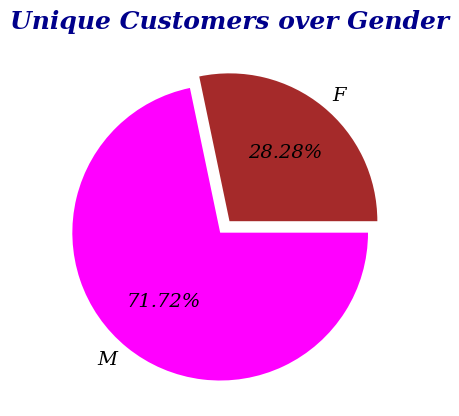

In [16]:
plt.pie(x = df_gender_dist.percent_share, labels = df_gender_dist.Gender,
        explode = [0, 0.1], autopct = '%.2f%%',
       textprops = {'fontsize' : 14,
                   'fontstyle' : 'oblique',
                   'fontfamily' : 'serif',
                   'fontweight' : 500},
       colors = ['brown', 'magenta'])
plt.title('Unique Customers over Gender', color = 'darkblue', fontdict = {'fontsize' : 18,
                                                'fontweight' : 600,
                                                'fontstyle' : 'oblique',
                                                'fontfamily' : 'serif'})
plt.show()

### **How many transactions are made by each gender category ?**

In [17]:
df.groupby(['Gender'])['User_ID'].count()

Gender
F    135809
M    414259
Name: User_ID, dtype: int64

In [18]:
print('Average number of transactions made by each Male on Black Friday is', round(414259 / 4225))
print('Average number of transactions made by each Female on Black Friday is', round(135809 / 1666))

Average number of transactions made by each Male on Black Friday is 98
Average number of transactions made by each Female on Black Friday is 82


### **What is the total Revenue generated by Walmart from each Gender?**

In [19]:
df_gender_revenue=pd.DataFrame(df.groupby(["Gender"])["Purchase"].sum().to_frame().reset_index())
df_gender_revenue['percent_share'] = np.round((df_gender_revenue['Purchase'] / df_gender_revenue['Purchase'].sum()) * 100, 2)
df_gender_revenue

,Gender,Purchase,percent_share
0,F,1186232642,23.28
1,M,3909580100,76.72


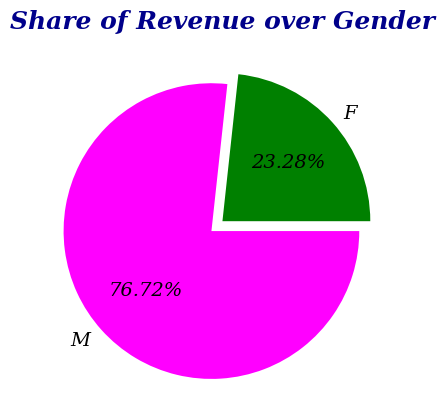

In [20]:
plt.pie(x = df_gender_revenue.percent_share, labels = df_gender_revenue.Gender,
        explode = [0, 0.1], autopct = '%.2f%%',
       textprops = {'fontsize' : 14,
                   'fontstyle' : 'oblique',
                   'fontfamily' : 'serif',
                   'fontweight' : 500},
       colors = ['Green', 'magenta'])
plt.title('Share of Revenue over Gender', color = 'darkblue', fontdict = {'fontsize' : 18,
                                                'fontweight' : 600,
                                                'fontstyle' : 'oblique',
                                                'fontfamily' : 'serif'})
plt.show()

### **What is the average total purchase made by each user for each gender ?**

In [21]:
df1 = pd.DataFrame(df.groupby(['Gender', 'User_ID'])['Purchase'].sum()).reset_index().rename(columns = {'Purchase' : 'Average_Purchase'})
df1.groupby(["Gender"])["Average_Purchase"].mean()

Gender
F    712024.394958
M    925344.402367
Name: Average_Purchase, dtype: float64

### **What is the Average Revenue generated by Walmart from each Gender per transaction ?**

In [22]:
pd.DataFrame(df.groupby('Gender')['Purchase'].mean()).reset_index().rename(columns = {'Purchase' : 'Average_Purchase per transaction'})

,Gender,Average_Purchase per transaction
0,F,8734.565765
1,M,9437.526040


### **How many unique customers are there for each Marital Status ?**

In [23]:
df_marital_status_dist = pd.DataFrame(df.groupby(['Marital_Status'])['User_ID'].nunique()).reset_index().rename(columns = {'User_ID' : 'unique_customers'})
df_marital_status_dist['percent_share'] = np.round(df_marital_status_dist['unique_customers'] / df_marital_status_dist['unique_customers'].sum() * 100, 2)
df_marital_status_dist

,Marital_Status,unique_customers,percent_share
0,Married,2474,42.0
1,Single,3417,58.0


[]

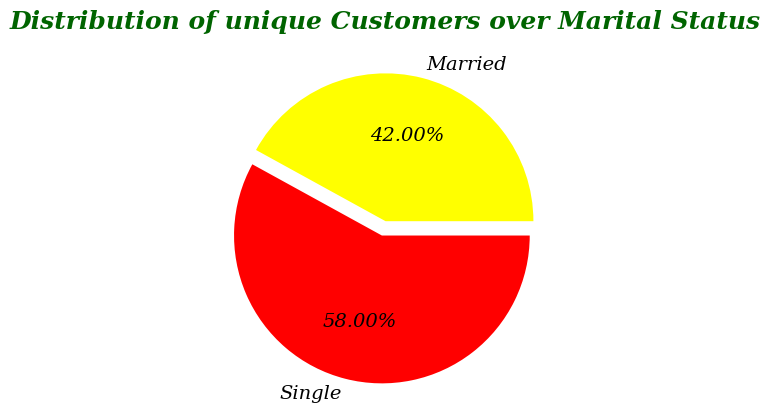

In [24]:
plt.pie(x = df_marital_status_dist.percent_share, labels = df_marital_status_dist.Marital_Status,
        explode = [0, 0.1], autopct = '%.2f%%',
       textprops = {'fontsize' : 14,
                   'fontstyle' : 'oblique',
                   'fontfamily' : 'serif',
                   'fontweight' : 500},
       colors = ['yellow', 'red'])
plt.title('Distribution of unique Customers over Marital Status', color = 'darkgreen', fontdict = {'fontsize' : 18,
                                                'fontweight' : 600,
                                                'fontstyle' : 'oblique',
                                                'fontfamily' : 'serif'})
plt.plot()

### **How many transactions are made by each Marital Status category ?**

In [25]:
df.groupby(['Marital_Status'])['User_ID'].count()

Marital_Status
Married    225337
Single     324731
Name: User_ID, dtype: int64

In [26]:
print('Average number of transactions made by each user with Marital status Married is', round(225337 / 2474))
print('Average number of transactions made by each with Marital status Single is', round(324731 / 3417))

Average number of transactions made by each user with Marital status Married is 91
Average number of transactions made by each with Marital status Single is 95


### **What is the total Revenue generated by Walmart from each Marital Status ?**

In [27]:
df_marital_status_revenue = df.groupby(by = ['Marital_Status'])['Purchase'].sum().to_frame().sort_values(by = 'Purchase', ascending = False).reset_index()
df_marital_status_revenue['percent_share'] = np.round((df_marital_status_revenue['Purchase'] / df_marital_status_revenue['Purchase'].sum()) * 100, 2)
df_marital_status_revenue

,Marital_Status,Purchase,percent_share
0,Single,3008927447,59.05
1,Married,2086885295,40.95


[]

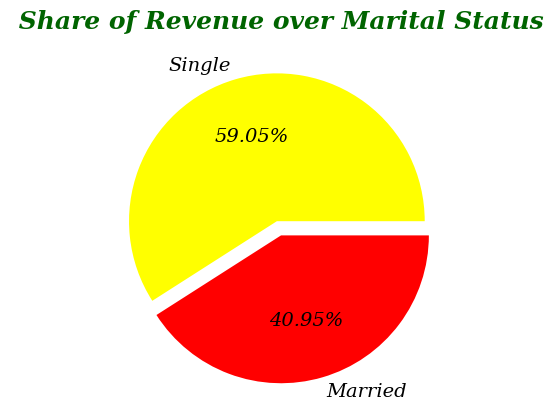

In [28]:
plt.pie(x = df_marital_status_revenue.percent_share, labels = df_marital_status_revenue.Marital_Status,
        explode = [0, 0.1], autopct = '%.2f%%',
       textprops = {'fontsize' : 14,
                   'fontstyle' : 'oblique',
                   'fontfamily' : 'serif',
                   'fontweight' : 500},
       colors = ['yellow', 'red'])
plt.title(' Share of Revenue over Marital Status', color = 'darkgreen', fontdict = {'fontsize' : 18,
                                                'fontweight' : 600,
                                                'fontstyle' : 'oblique',
                                                'fontfamily' : 'serif'})
plt.plot()

### **What is the average total purchase made by each user in each marital status ?**

In [29]:
df1=pd.DataFrame(df.groupby(["Marital_Status","User_ID"])["Purchase"].sum()).reset_index().rename(columns = {'Purchase' : 'Average_Purchase'})
df1.groupby('Marital_Status')['Average_Purchase'].mean()

Marital_Status
Married    354249.753013
Single     510766.838737
Name: Average_Purchase, dtype: float64

### **How many transactions are made by each Age group ?**

In [30]:
df_age_dist = pd.DataFrame(df.groupby(['Age'])['User_ID'].nunique()).reset_index().rename(columns = {'User_ID' : 'unique_customers'}).sort_values(by = 'unique_customers', ascending = False)
df_age_dist['percent_share'] =  np.round(df_age_dist['unique_customers'] / df_age_dist['unique_customers'].sum() * 100, 2)
df_age_dist

,Age,unique_customers,percent_share
2,26-35,2053,34.85
3,36-45,1167,19.81
1,18-25,1069,18.15
4,46-50,531,9.01
5,51-55,481,8.16
6,55+,372,6.31
0,0-17,218,3.70


[]

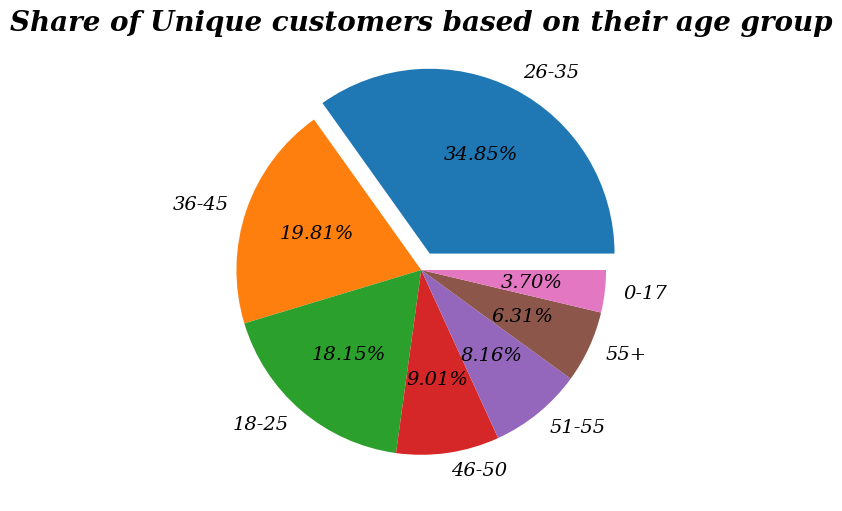

In [31]:
plt.figure(figsize=(8,6))
plt.pie(x=df_age_dist["percent_share"], labels= df_age_dist["Age"], explode=(0.1,0,0,0,0,0,0), autopct = '%.2f%%',textprops = {'fontsize' : 14,
                   'fontstyle' : 'oblique',
                   'fontfamily' : 'serif',
                   'fontweight' : 500})
plt.title('Share of Unique customers based on their age group', fontdict = {'fontsize' : 20,
                   'fontstyle' : 'oblique',
                   'fontfamily' : 'serif',
                   'fontweight' : 600})
plt.plot()

### **What is the distribution of number of transactions among age groups ?**

[]

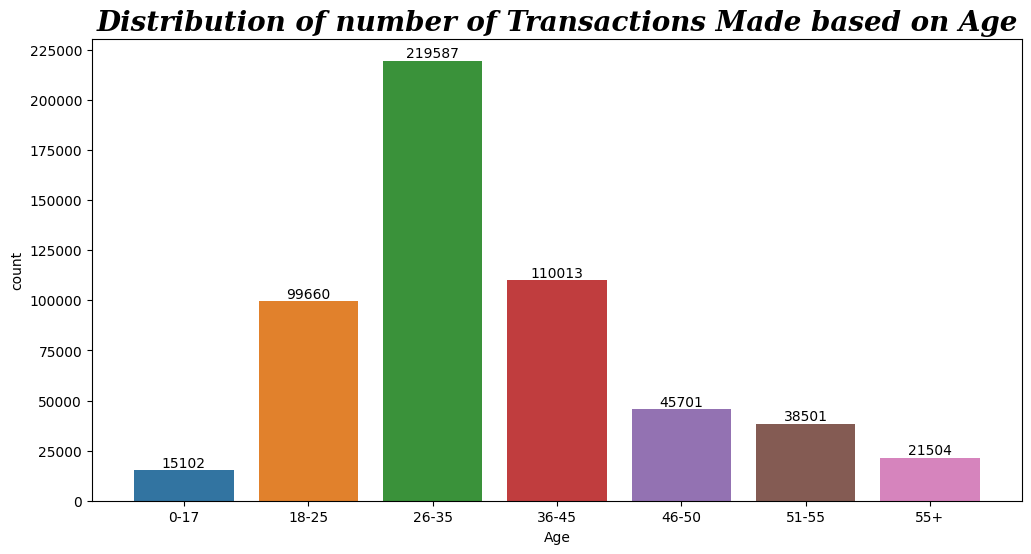

In [32]:
df["Age"].value_counts()
plt.figure(figsize = (12, 6))
ax=sns.countplot(data = df, x = 'Age',
              order = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'])
ax.bar_label(ax.containers[0])
plt.title('Distribution of number of Transactions Made based on Age',
          fontsize = 20,
          fontweight = 600,
          fontstyle = 'oblique',
          fontfamily = 'serif')
plt.yticks(np.arange(0, 250001, 25000))
plt.plot()

In [33]:
df_age_revenue = pd.DataFrame(df.groupby('Age')['Purchase'].sum()).reset_index().sort_values(by = 'Purchase', ascending = False)
df_age_revenue['percent_share'] = np.round((df_age_revenue['Purchase'] / df_age_revenue['Purchase'].sum()) * 100, 2)
df_age_revenue

,Age,Purchase,percent_share
2,26-35,2031770578,39.87
3,36-45,1026569884,20.15
1,18-25,913848675,17.93
4,46-50,420843403,8.26
5,51-55,367099644,7.20
6,55+,200767375,3.94
0,0-17,134913183,2.65


[]

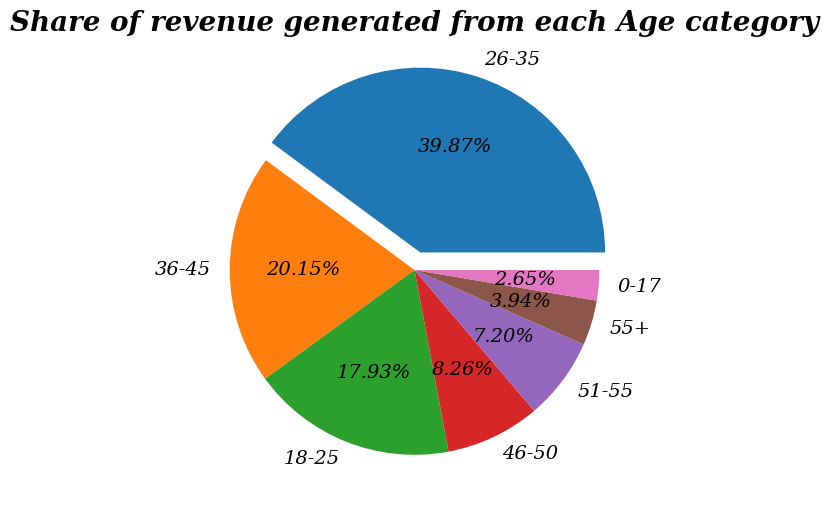

In [34]:
plt.figure(figsize=(8,6))
plt.pie(x=df_age_revenue["percent_share"], labels= df_age_revenue["Age"], explode=(0.1,0,0,0,0,0,0), autopct = '%.2f%%',textprops = {'fontsize' : 14,
                   'fontstyle' : 'oblique',
                   'fontfamily' : 'serif',
                   'fontweight' : 500})
plt.title('Share of revenue generated from each Age category', fontdict = {'fontsize' : 20,
                   'fontstyle' : 'oblique',
                   'fontfamily' : 'serif',
                   'fontweight' : 600})
plt.plot()

### **How many transactions are made by each city Category ?**

In [35]:
df_city_dist = pd.DataFrame(df.groupby(['City_Category'])['User_ID'].nunique()).reset_index().rename(columns = {'User_ID' : 'unique_customers'})
df_city_dist['percent_share'] = np.round((df_city_dist['unique_customers'] / df_city_dist['unique_customers'].sum()) * 100, 2)
df_city_dist

,City_Category,unique_customers,percent_share
0,A,1045,17.74
1,B,1707,28.98
2,C,3139,53.28


[]

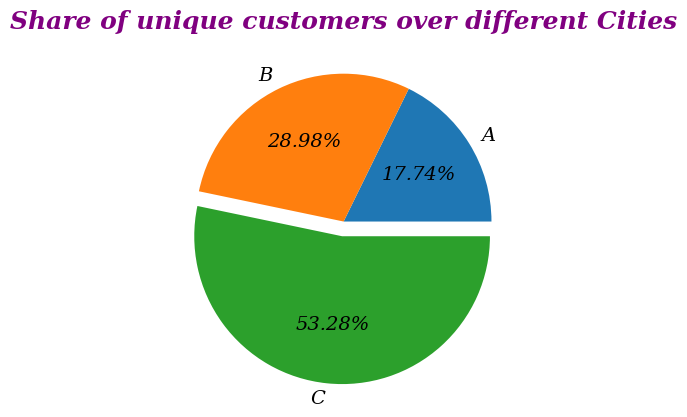

In [36]:
plt.pie(x = df_city_dist.percent_share, labels = df_city_dist.City_Category,
        explode = [0, 0, 0.1], autopct = '%.2f%%',
       textprops = {'fontsize' : 14,
                   'fontstyle' : 'oblique',
                   'fontfamily' : 'serif',
                   'fontweight' : 500})
plt.title("Share of unique customers over different Cities", color = 'purple', fontdict = {'fontsize' : 18,
                                                'fontweight' : 555,
                                                'fontstyle' : 'oblique',
                                                'fontfamily' : 'serif'})
plt.plot()

In [37]:
df['City_Category'].value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

### **What is the revenue generated from different cities ?**

In [38]:
df_city_revenue = df.groupby(['City_Category'])['Purchase'].sum().to_frame().sort_values(by = 'Purchase', ascending = False).reset_index()
df_city_revenue['percent_share'] = np.round((df_city_revenue['Purchase'] / df_city_revenue['Purchase'].sum()) * 100, 2)
df_city_revenue

,City_Category,Purchase,percent_share
0,B,2115533605,41.52
1,C,1663807476,32.65
2,A,1316471661,25.83


[]

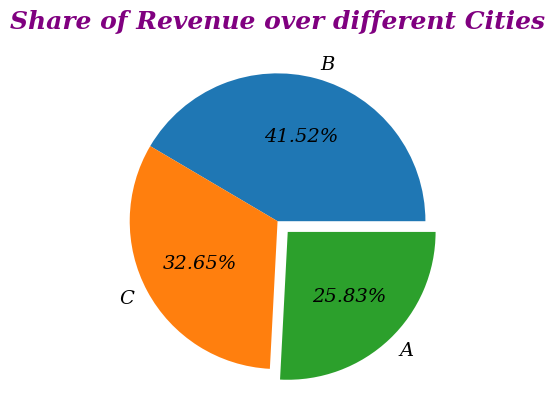

In [39]:
plt.pie(x = df_city_revenue.percent_share, labels = df_city_revenue.City_Category,
        explode = [0, 0, 0.1], autopct = '%.2f%%',
       textprops = {'fontsize' : 14,
                   'fontstyle' : 'oblique',
                   'fontfamily' : 'serif',
                   'fontweight' : 500})
plt.title("Share of Revenue over different Cities", color = 'purple', fontdict = {'fontsize' : 18,
                                                'fontweight' : 555,
                                                'fontstyle' : 'oblique',
                                                'fontfamily' : 'serif'})
plt.plot()

### **What are unique products present in different categories?**

In [40]:
df.groupby(['Product_Category'])['Product_ID'].nunique()

Product_Category
1      493
2      152
3       90
4       88
5      967
6      119
7      102
8     1047
9        2
10      25
11     254
12      25
13      35
14      44
15      44
16      98
17      11
18      30
19       2
20       3
Name: Product_ID, dtype: int64

### **What is the revenue generated from different product categories ?**

In [41]:
df_product_revenue = df.groupby(by = ['Product_Category'])['Purchase'].sum().to_frame().sort_values(by = 'Purchase', ascending = False).reset_index()
df_product_revenue['percent_share'] = np.round((df_product_revenue['Purchase'] / df_product_revenue['Purchase'].sum()) * 100, 2)
df_product_revenue

,Product_Category,Purchase,percent_share
0,1,1910013754,37.48
1,5,941835229,18.48
2,8,854318799,16.77
3,6,324150302,6.36
4,2,268516186,5.27
5,3,204084713,4.00
6,16,145120612,2.85
7,11,113791115,2.23
8,10,100837301,1.98
9,15,92969042,1.82


In [42]:
top5 = df_product_revenue.head(5)['Purchase'].sum() /  df_product_revenue['Purchase'].sum()
top5 = np.round(top5 * 100, 2)
print(f'Top 5 product categories from which Walmart makes {top5} % of total revenue are : {list(df_product_revenue["Product_Category"].head())}')

Top 5 product categories from which Walmart makes 84.36 % of total revenue are : [1, 5, 8, 6, 2]


[]

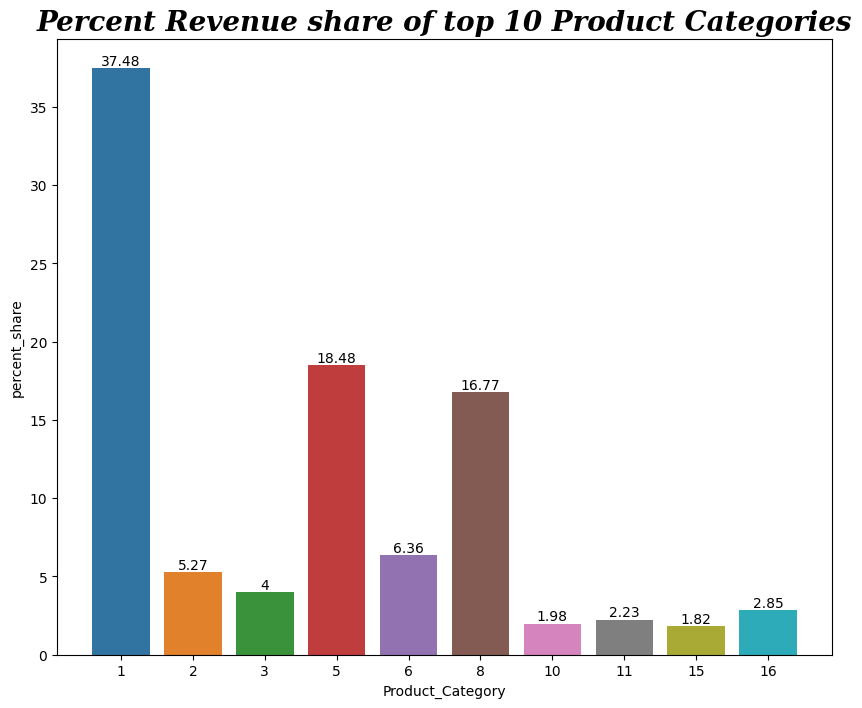

In [43]:
plt.figure(figsize = (10, 8))
ax=sns.barplot(data = df_product_revenue, x = df_product_revenue.head(10)['Product_Category'], y = df_product_revenue.head(10)['percent_share'])
ax.bar_label(ax.containers[0])
plt.title('Percent Revenue share of top 10 Product Categories', fontsize = 20, fontweight = 600, fontfamily = 'serif', fontstyle = 'oblique')
plt.plot()

### **What is the distribution of number of transanctions based on product categories?**

[]

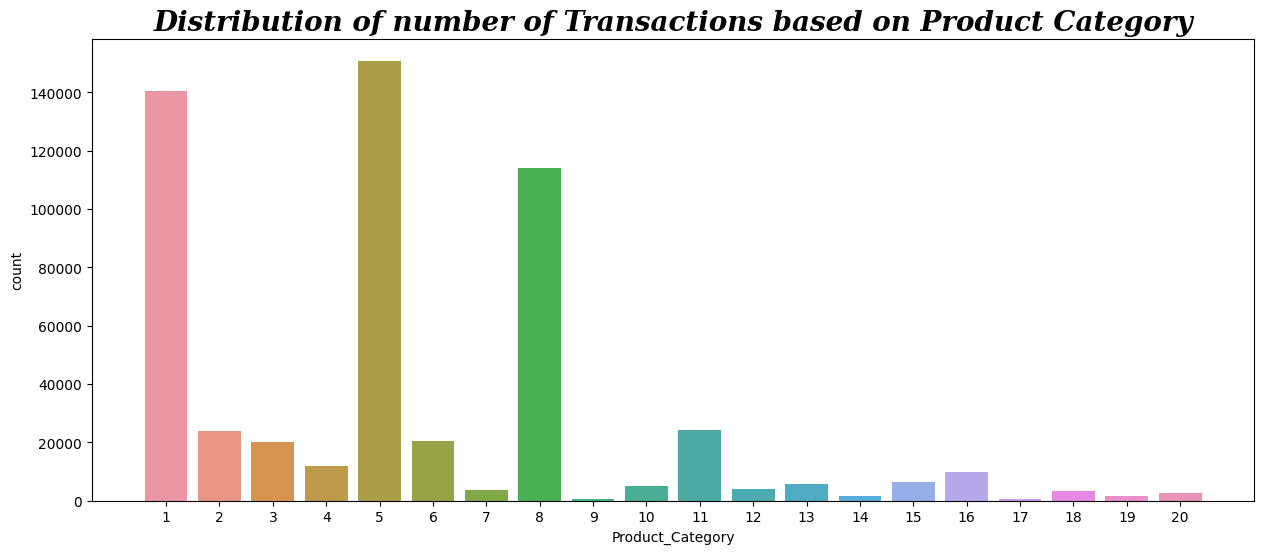

In [44]:
plt.figure(figsize = (15, 6))
plt.title('Distribution of number of Transactions based on Product Category', fontsize = 20, fontweight = 600, fontstyle = 'oblique', fontfamily = 'serif')
sns.countplot(data = df, x = 'Product_Category')
plt.plot()

### **What is the distribution of revenue among different product categories ?**

[]

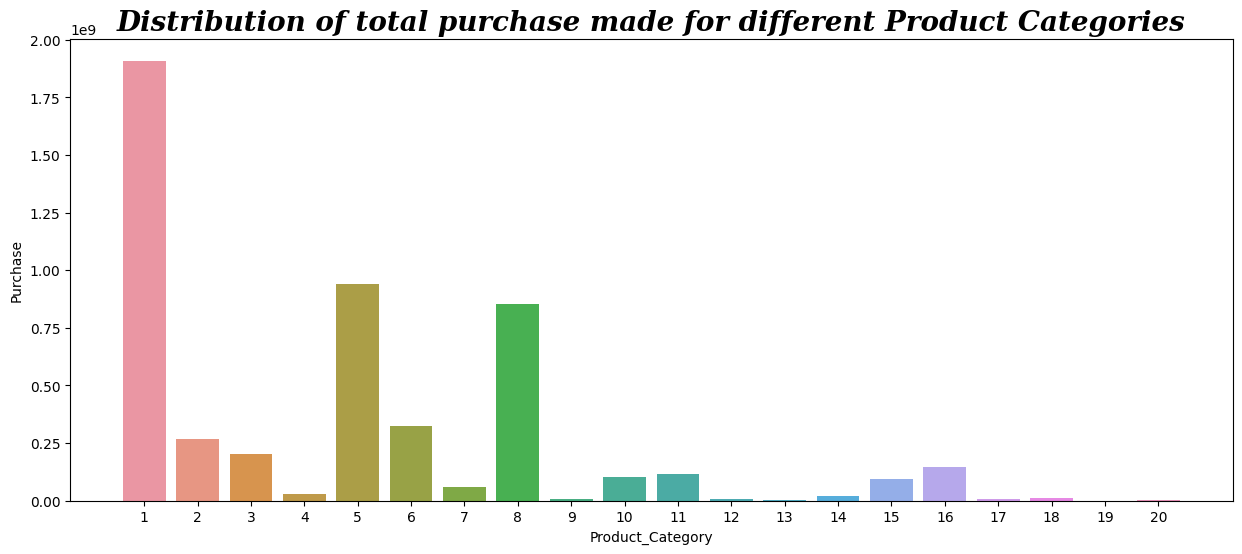

In [45]:
df_product_category = df.groupby('Product_Category')['Purchase'].sum().to_frame().reset_index()
plt.figure(figsize = (15, 6))
plt.title('Distribution of total purchase made for different Product Categories',
          fontsize = 20,
          fontweight = 600,
          fontstyle = 'oblique',
          fontfamily = 'serif')
sns.barplot(data = df_product_category, x = 'Product_Category', y = 'Purchase')
plt.plot()

### **What is the distribution of number of transactions based on Occupation?**

[]

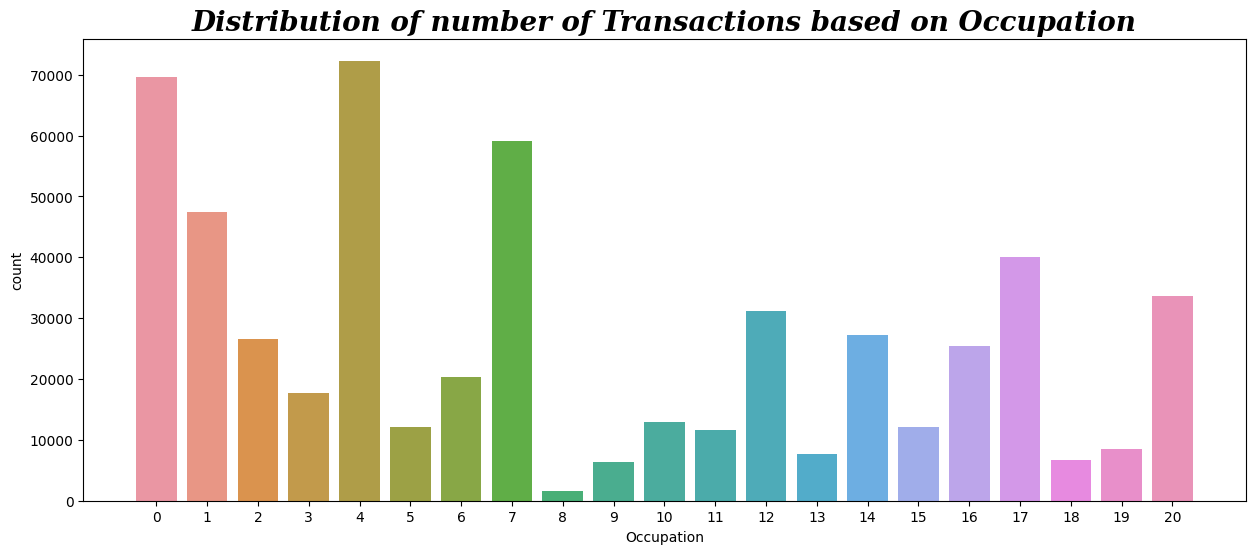

In [46]:
plt.figure(figsize = (15, 6))
plt.title('Distribution of number of Transactions based on Occupation',
          fontsize = 20,
          fontweight = 600,
          fontstyle = 'oblique',
          fontfamily = 'serif')
sns.countplot(data = df, x = 'Occupation')
plt.plot()

### **What is the distribution of revenue among different Occupations?**

[]

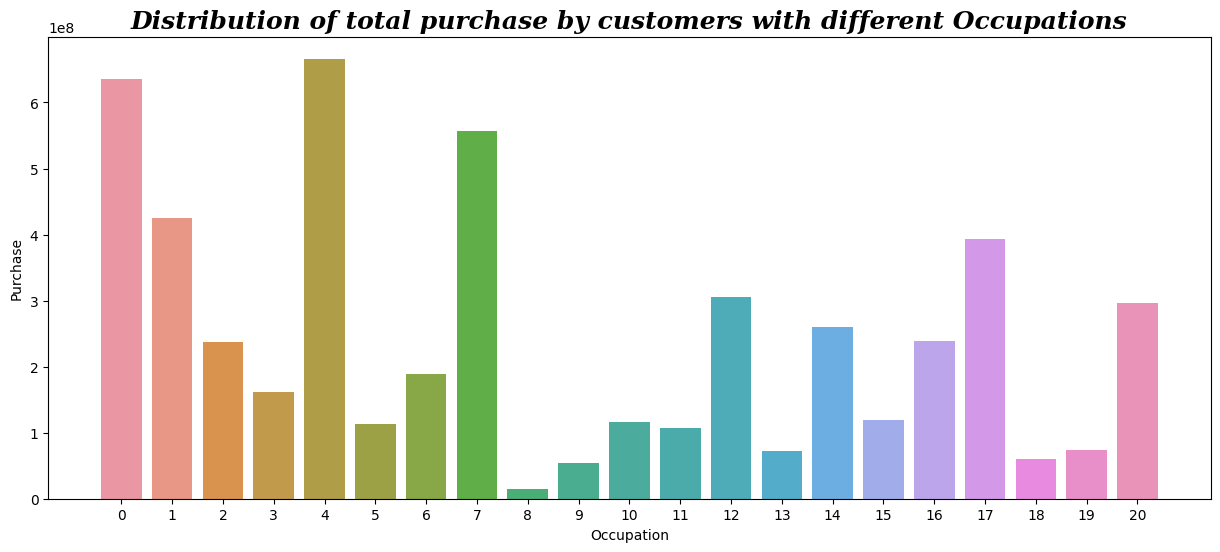

In [47]:
df_occupation = df.groupby('Occupation')['Purchase'].sum().to_frame().reset_index()
plt.figure(figsize = (15, 6))
plt.title('Distribution of total purchase by customers with different Occupations',
          fontsize = 18,
          fontweight = 600,
          fontstyle = 'oblique',
          fontfamily = 'serif')
sns.barplot(data = df_occupation, x = 'Occupation', y = 'Purchase')
plt.plot()

### **What is the distribution of number of transactions among Stay in current city years?**

[]

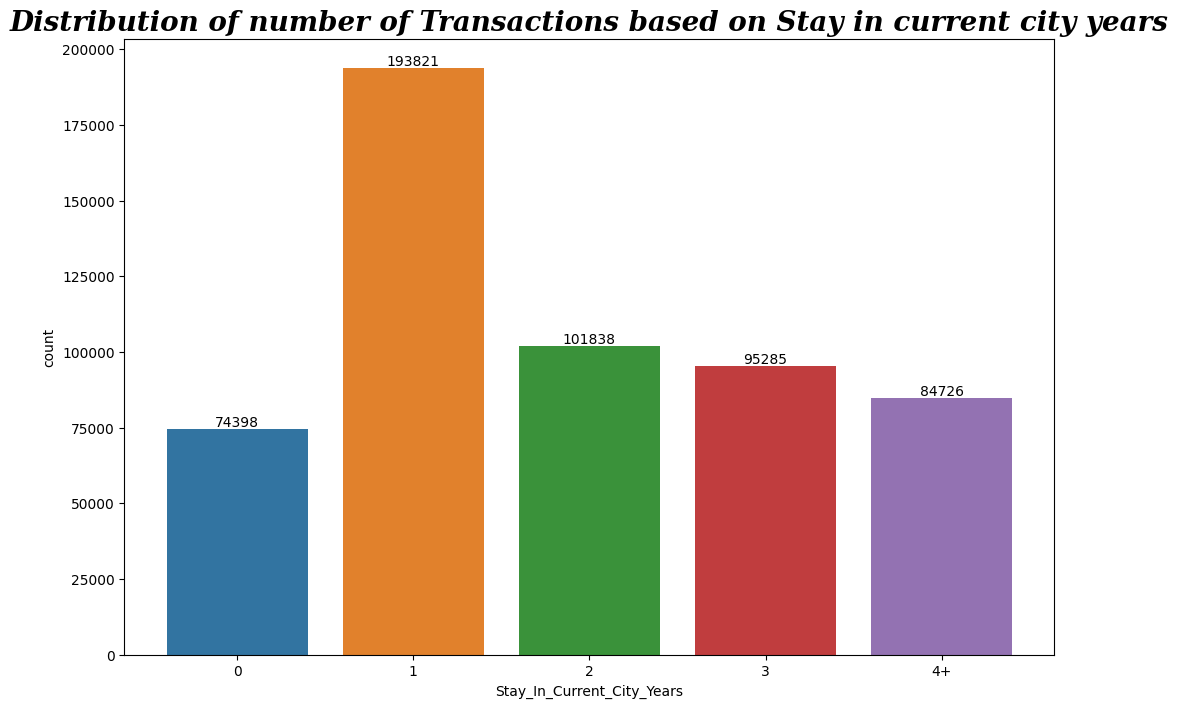

In [48]:
plt.figure(figsize = (12, 8))
plt.title('Distribution of number of Transactions based on Stay in current city years',
          fontsize = 20,
          fontweight = 600,
          fontstyle = 'oblique',
          fontfamily = 'serif')
ax=sns.countplot(data = df, x = 'Stay_In_Current_City_Years')
ax.bar_label(ax.containers[0])
plt.plot()

### **What is the distribution of revenue among Stay in current city years?**

[]

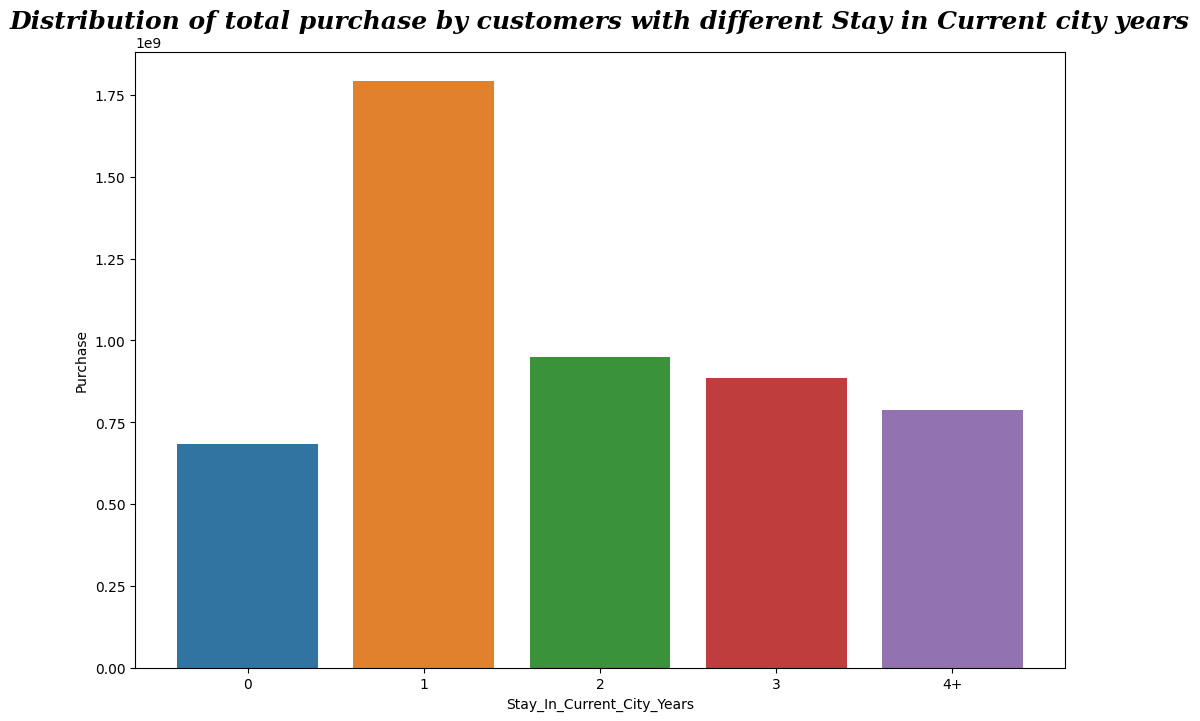

In [145]:
df_Stay_in = df.groupby('Stay_In_Current_City_Years')['Purchase'].sum().to_frame().reset_index()
plt.figure(figsize = (12,8))
plt.title('Distribution of total purchase by customers with different Stay in Current city years',
          fontsize = 18,
          fontweight = 600,
          fontstyle = 'oblique',
          fontfamily = 'serif')
sns.barplot(data = df_Stay_in, x = 'Stay_In_Current_City_Years', y = 'Purchase')
plt.plot()

Difference between mean and median of purchase is 1216.97


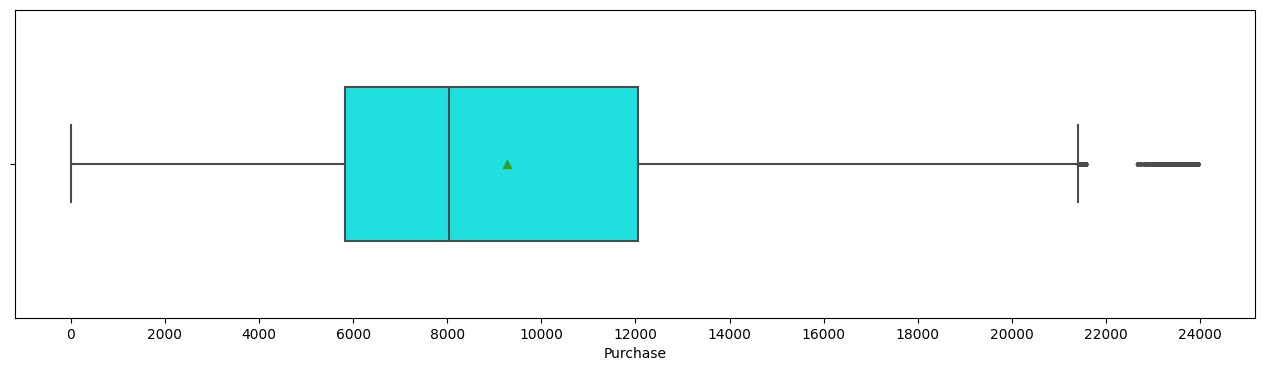

In [50]:
print('Difference between mean and median of purchase is', round(df["Purchase"].mean()-df["Purchase"].median(),2))
plt.figure(figsize = (16, 4))
sns.boxplot(data = df,
            x = 'Purchase',
            showmeans = True,
            fliersize = 2,
            width = 0.5,
            color = 'cyan')
plt.xticks(np.arange(0, 25001, 2000))
plt.show()

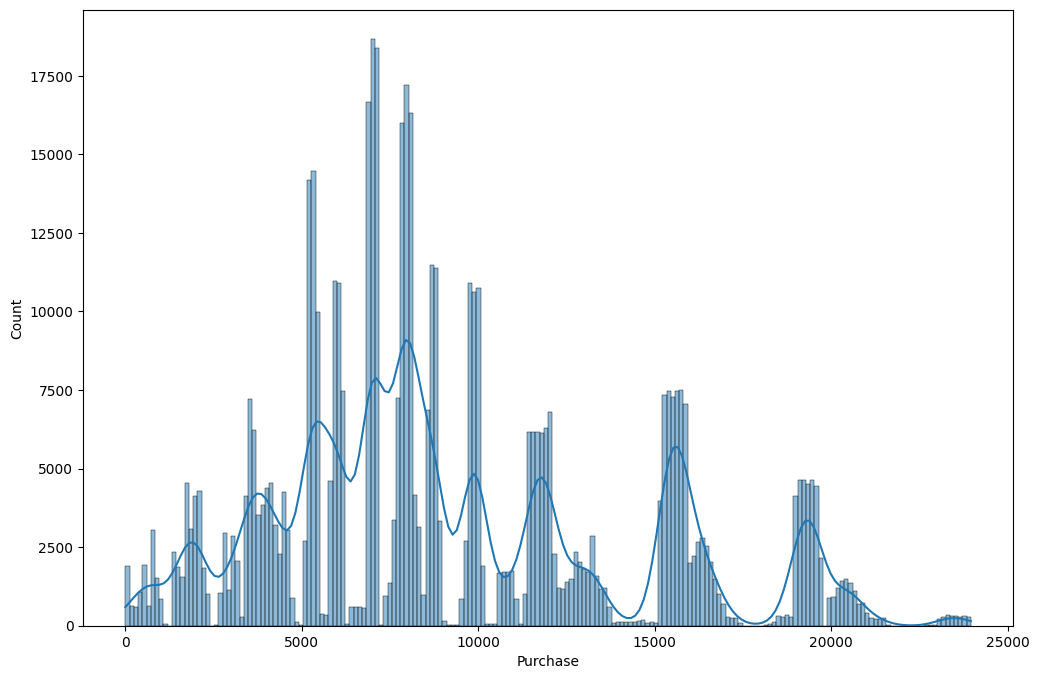

In [51]:
plt.figure(figsize = (12, 8))
sns.histplot(data = df, x = 'Purchase', kde = True, bins = 200)
plt.show()

[]

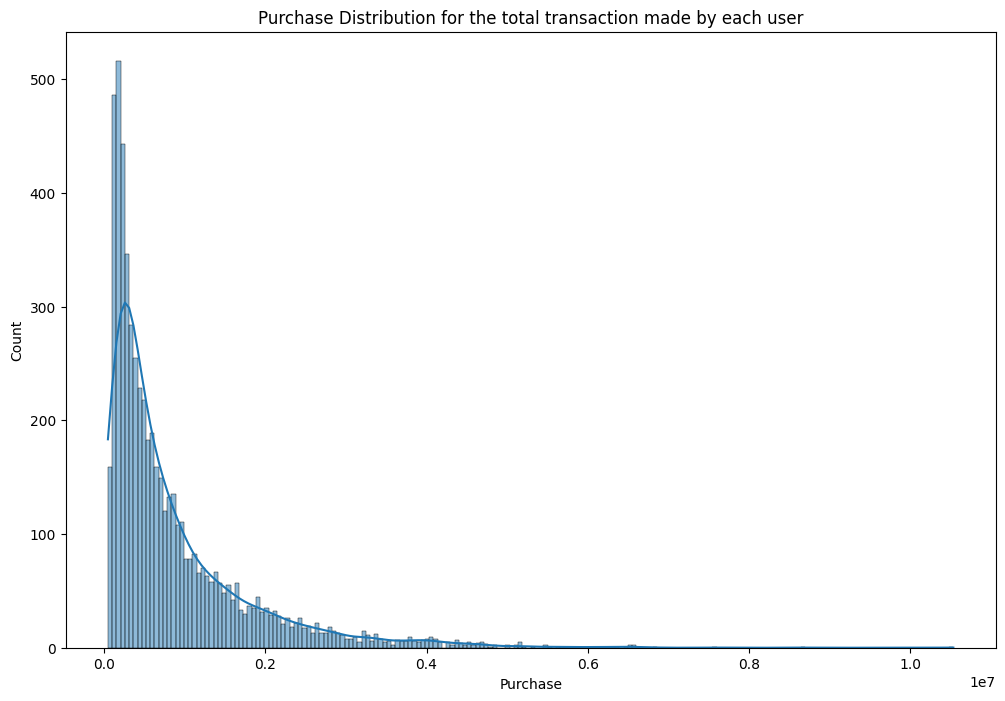

In [52]:
plt.figure(figsize = (12, 8))
plt.title('Purchase Distribution for the total transaction made by each user')
df_customer = df.groupby('User_ID')['Purchase'].sum()
sns.histplot(data = df_customer, kde = True, bins = 200)
plt.plot()

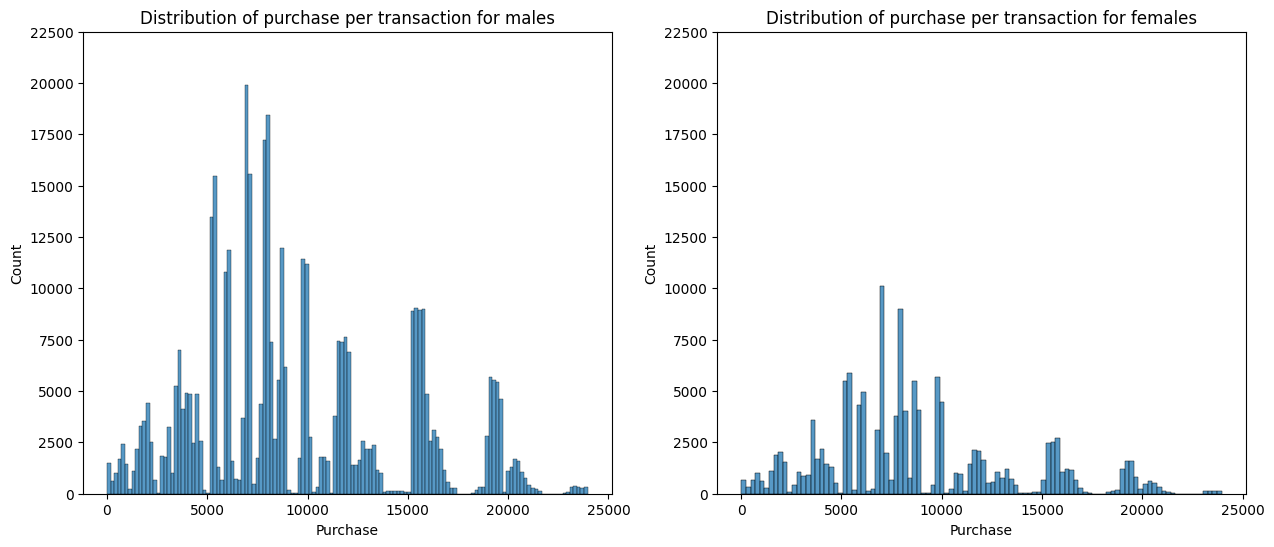

In [53]:
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
plt.title('Distribution of purchase per transaction for males')
df_male = df[df['Gender'] == 'M']
sns.histplot(data = df_male, x = 'Purchase')
plt.yticks(np.arange(0, 22550, 2500))
plt.subplot(1, 2 ,2)
plt.title('Distribution of purchase per transaction for females')
df_female = df[df['Gender'] == 'F']
sns.histplot(data = df_female, x = 'Purchase')
plt.yticks(np.arange(0, 22550, 2500))
plt.show()

In [54]:
df_cust_gender = pd.DataFrame(df.groupby(['Gender', 'User_ID'])['Purchase'].sum()).reset_index().rename(columns = {'Purchase' : 'Total_Purchase'})
df_cust_gender

,Gender,User_ID,Total_Purchase
0,F,1000001,334093
1,F,1000006,379930
2,F,1000010,2169510
3,F,1000011,557023
4,F,1000016,150490
...,...,...,...
5886,M,1006030,737361
5887,M,1006032,517261
5888,M,1006033,501843
5889,M,1006034,197086


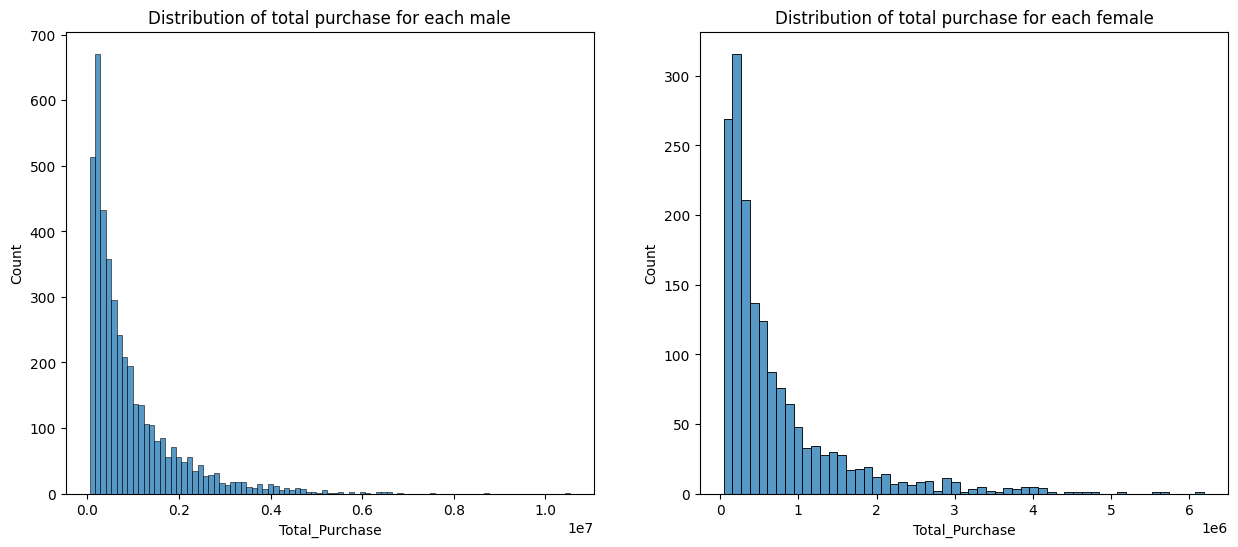

In [55]:
df_male_customer = df_cust_gender.loc[df_cust_gender['Gender'] == 'M']
df_female_customer = df_cust_gender.loc[df_cust_gender['Gender'] == 'F']
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
plt.title('Distribution of total purchase for each male')
sns.histplot(data = df_male_customer, x = 'Total_Purchase')
plt.subplot(1, 2 ,2)
plt.title('Distribution of total purchase for each female')
df_female = df[df['Gender'] == 'F']
sns.histplot(data = df_female_customer, x = 'Total_Purchase')
plt.show()

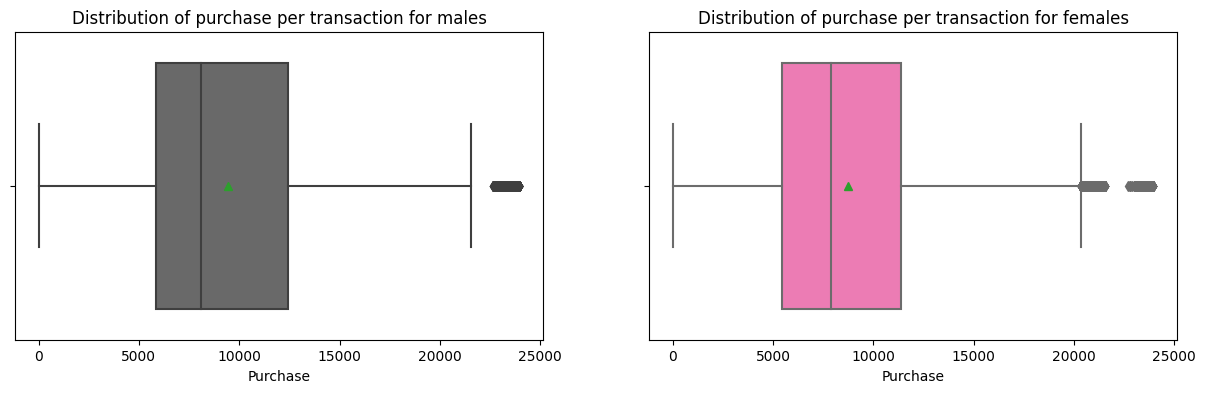

Difference between mean and median of purchase per transaction for male is 1339.53
Difference between mean and median of purchase per transaction for female is 820.57


In [56]:
plt.figure(figsize = (15, 4))
plt.subplot(1, 2, 1)
plt.title('Distribution of purchase per transaction for males')
sns.boxplot(data = df_male, x = 'Purchase', showmeans = True, color = 'dimgray')
plt.subplot(1, 2 ,2)
plt.title('Distribution of purchase per transaction for females')
sns.boxplot(data = df_female, x = 'Purchase', showmeans = True, color = 'hotpink')
plt.show()
print('Difference between mean and median of purchase per transaction for male is', round(df_male["Purchase"].mean()-df_male["Purchase"].median(),2))
print('Difference between mean and median of purchase per transaction for female is', round(df_female["Purchase"].mean()-df_female["Purchase"].median(),2))

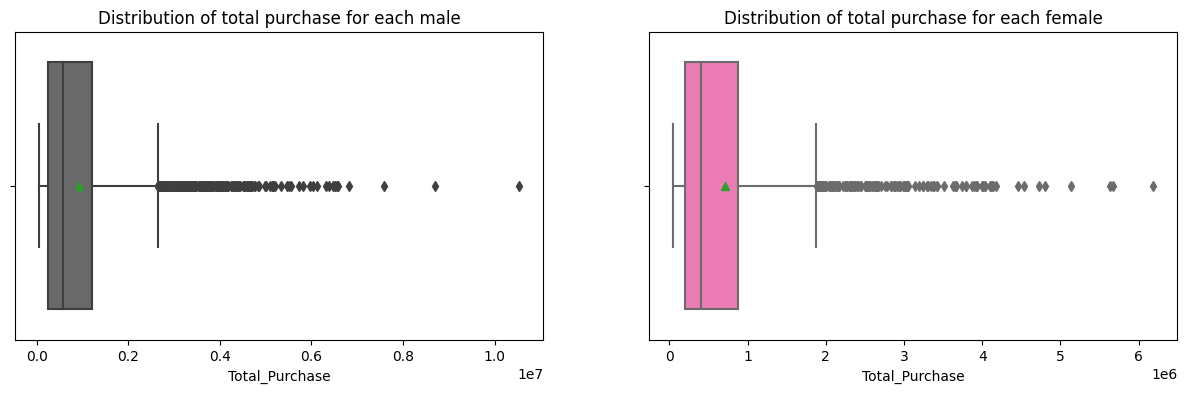

Difference between mean and median of total purchase for each male is 346804.4
Difference between mean and median of total purchase for each male is 304761.39


In [57]:
plt.figure(figsize = (15, 4))
plt.subplot(1, 2, 1)
plt.title('Distribution of total purchase for each male')
sns.boxplot(data = df_male_customer, x = 'Total_Purchase', showmeans = True, color = 'dimgray')
plt.subplot(1, 2 ,2)
plt.title('Distribution of total purchase for each female')
sns.boxplot(data = df_female_customer, x = 'Total_Purchase', showmeans = True, color = 'hotpink')
plt.show()
print('Difference between mean and median of total purchase for each male is', round(df_male_customer["Total_Purchase"].mean()-df_male_customer["Total_Purchase"].median(),2))
print('Difference between mean and median of total purchase for each male is', round(df_female_customer["Total_Purchase"].mean()-df_female_customer["Total_Purchase"].median(),2))

# **BIVARIATE ANALYSIS**

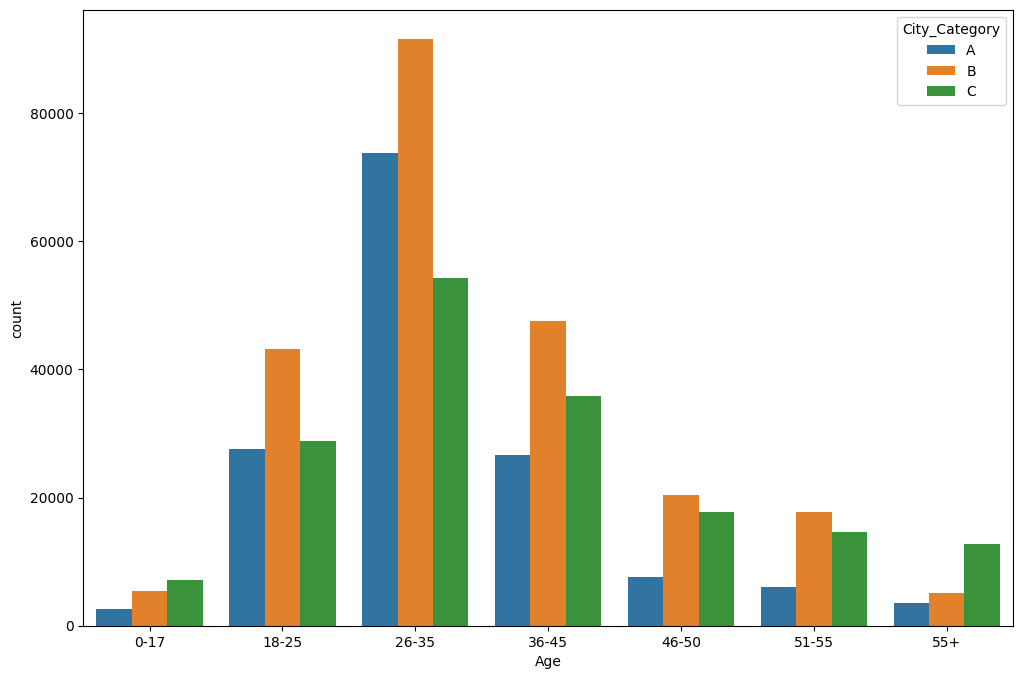

In [58]:
plt.figure(figsize=(12,8))
sns.countplot(data=df,x="Age", hue="City_Category")
plt.show()

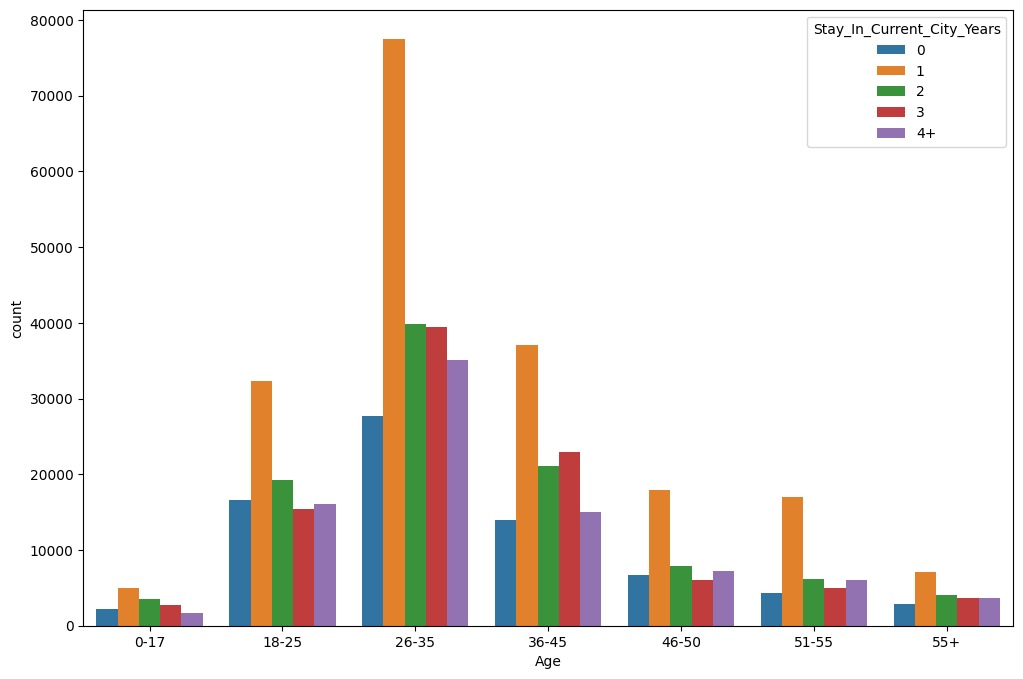

In [59]:
plt.figure(figsize=(12,8))
sns.countplot(data=df,x="Age", hue="Stay_In_Current_City_Years")
plt.show()

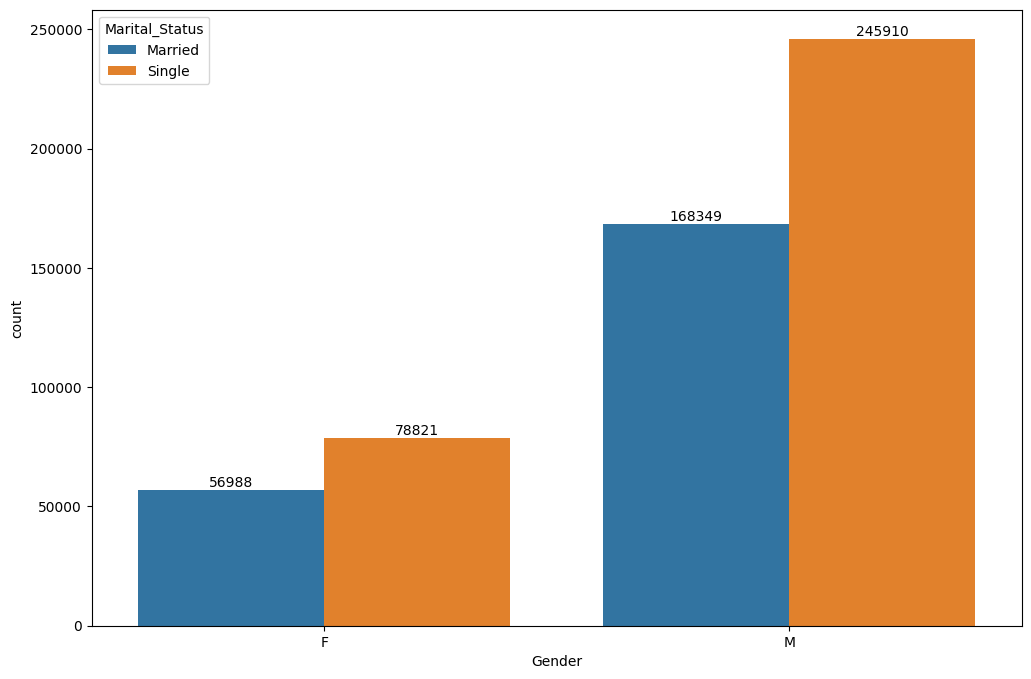

In [139]:
plt.figure(figsize=(12,8))
ax=sns.countplot(data=df,x="Gender", hue="Marital_Status")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

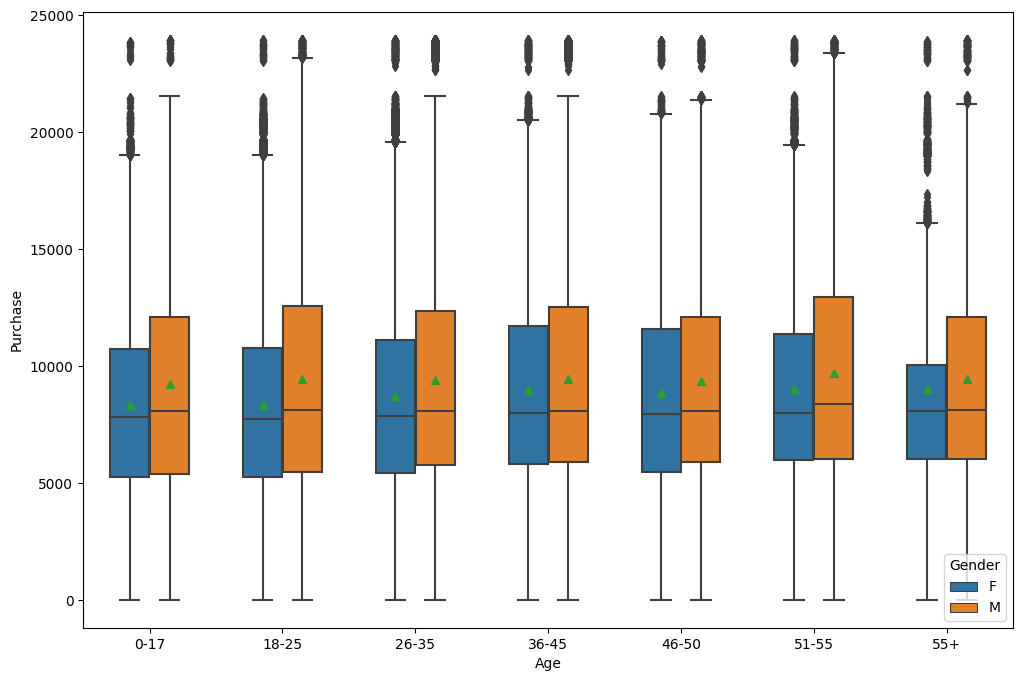

In [61]:
plt.figure(figsize = (12, 8))
sns.boxplot(data = df, x = 'Age', y = 'Purchase', hue = 'Gender', showmeans = True, width = 0.6)
plt.show()

[]

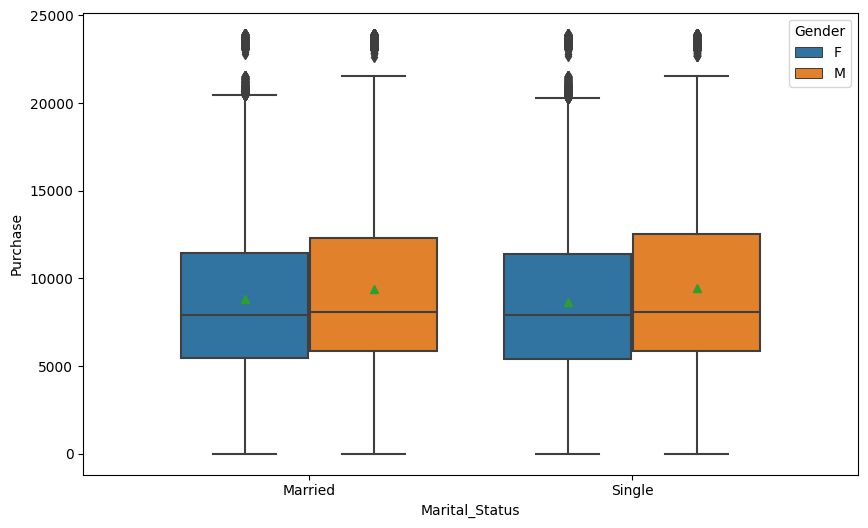

In [62]:
plt.figure(figsize = (10, 6))
sns.boxplot(data = df, x = 'Marital_Status', y = 'Purchase', hue = 'Gender', showmeans = True, width  = 0.8)
plt.plot()

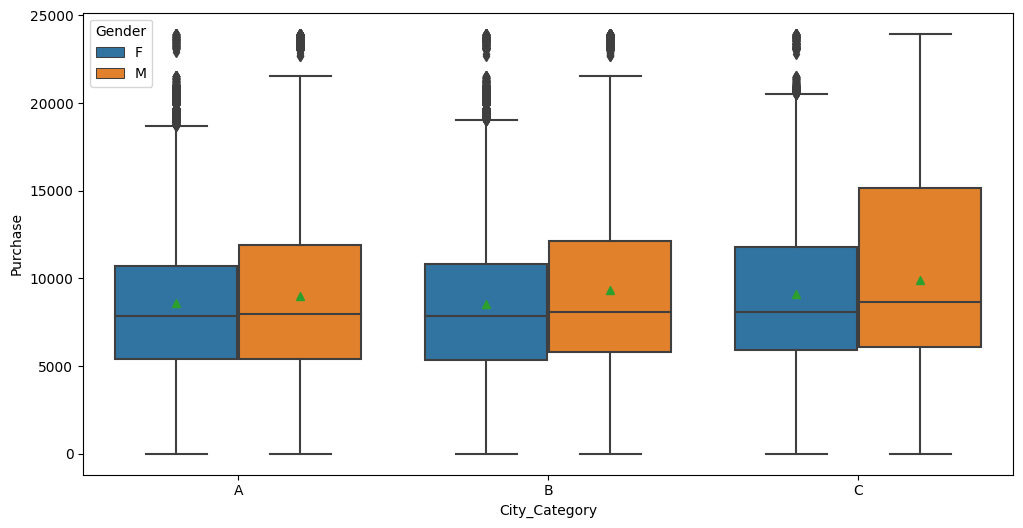

In [63]:
plt.figure(figsize = (12, 6))
sns.boxplot(data = df, x = 'City_Category', y = 'Purchase', hue = 'Gender', showmeans = True)
plt.show()

[]

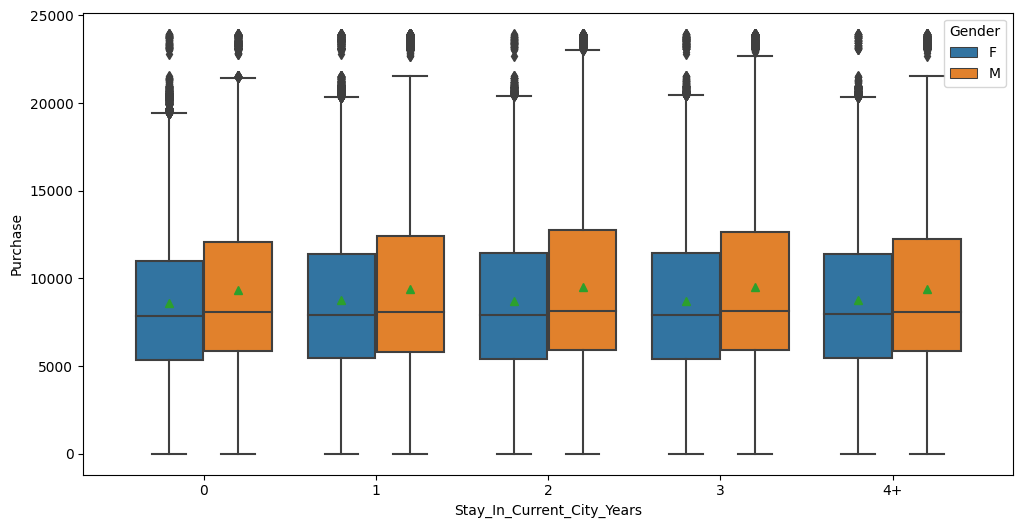

In [64]:
plt.figure(figsize = (12  , 6))
sns.boxplot(data = df, x = 'Stay_In_Current_City_Years', y = 'Purchase', hue = 'Gender', showmeans = True)
plt.plot()

# **CONFIDENCE INTERVAL CALCULATION**

## **Determining the mean purchase made by each user**

### **For Males**

**How the deviations vary for different sample sizes?**

In [65]:
df_male_customer

,Gender,User_ID,Total_Purchase
1666,M,1000002,810472
1667,M,1000003,341635
1668,M,1000004,206468
1669,M,1000005,821001
1670,M,1000007,234668
...,...,...,...
5886,M,1006030,737361
5887,M,1006032,517261
5888,M,1006033,501843
5889,M,1006034,197086


In [66]:
# This code performs a loop to calculate the mean purchase for different sample sizes of male customers.
mean_purchases = []
for sample_size in range(50, 4000):
    sample_mean = df_male_customer['Total_Purchase'].sample(sample_size).mean()
    mean_purchases.append(sample_mean)
# It iterates over a range of sample sizes from 50 to 4000, and for each iteration,
# it takes a random sample of the specified size from the 'Total_Purchase' column
# of the 'df_male_customer' DataFrame and calculates the mean of the sampled values.
# The calculated mean values are then stored in the 'mean_purchases' list.

[]

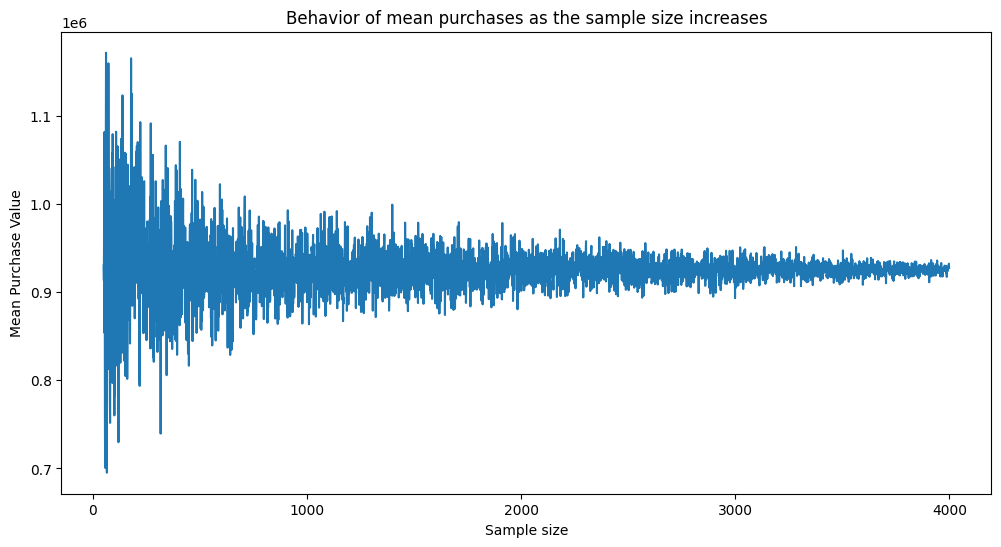

In [67]:
# Let's plot to visualize the trend of the mean purchases as the sample size increases, the standard error which is (1/np.sqrt(n))
plt.figure(figsize = (12, 6))
plt.title('Behavior of mean purchases as the sample size increases')
plt.plot(np.arange(50, 4000), mean_purchases)
plt.xticks(np.arange(0, 10001, 1000))
plt.xlabel('Sample size')
plt.ylabel('Mean Purchase Value')
plt.plot()

### **Finding the confidence interval of each male's total spending on the Black Friday**

In [68]:
means_male = []
size = df_male_customer['Total_Purchase'].shape[0]
for bootstrapped_sample in range(10000):
    sample_mean = df_male_customer['Total_Purchase'].sample(size, replace = True).mean()
    means_male.append(sample_mean)

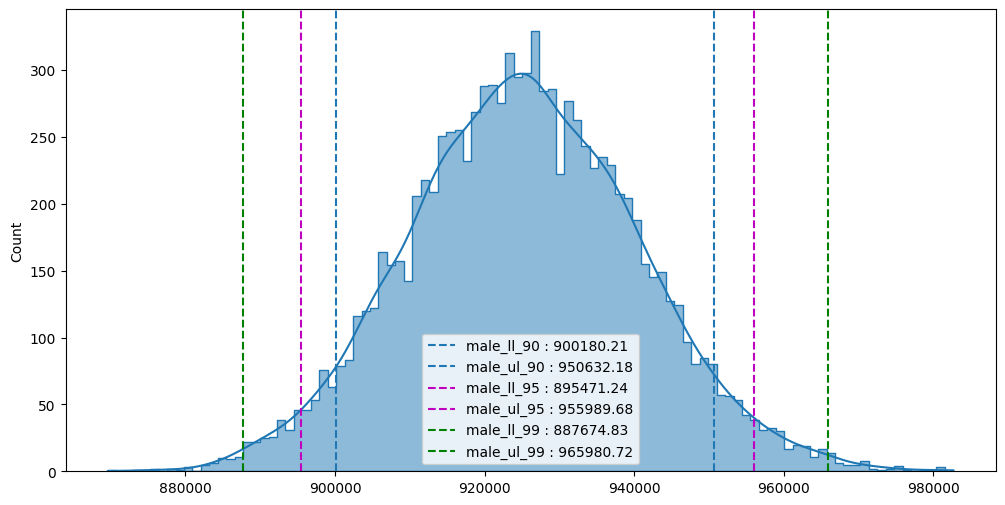

In [69]:
# The below code generates a histogram plot with kernel density estimation and
    # adds vertical lines to represent confidence intervals at 90%, 95%, and 99% level

plt.figure(figsize = (12, 6))   # setting the figure size of the plot
sns.histplot(means_male, kde = True, bins = 100, fill = True, element = 'step')

# Above line plots a histogram of the data contained in the `means_male` variable.
    # The `kde=True` argument adds a kernel density estimation line to the plot.
    # The `bins=100` argument sets the number of bins for the histogram

# Above line calculates the z-score corresponding to the 90% confidence level using the
    # inverse of the cumulative distribution function (CDF) of a standard normal distribution

male_ll_90 = np.percentile(means_male, 5)
    # calculating the lower limit of the 90% confidence interval
male_ul_90 = np.percentile(means_male, 95)
    # calculating the upper limit of the 90% confidence interval
plt.axvline(male_ll_90, label = f'male_ll_90 : {round(male_ll_90, 2)}', linestyle = '--')
    # adding a vertical line at the lower limit of the 90% confidence interval
plt.axvline(male_ul_90, label = f'male_ul_90 : {round(male_ul_90, 2)}', linestyle = '--')
    # adding a vertical line at the upper limit of the 90% confidence interval

# Similar steps are repeated for calculating and plotting the 95% and 99% confidence intervals,
    # with different line colors (`color='m'` for 95% and `color='g'` for 99%)

male_ll_95 = np.percentile(means_male, 2.5)
male_ul_95 = np.percentile(means_male, 97.5)
plt.axvline(male_ll_95, label = f'male_ll_95 : {round(male_ll_95, 2)}', linestyle = '--', color = 'm')
plt.axvline(male_ul_95, label = f'male_ul_95 : {round(male_ul_95, 2)}', linestyle = '--', color = 'm')

male_ll_99 = np.percentile(means_male, 0.5)
male_ul_99 = np.percentile(means_male, 99.5)
plt.axvline(male_ll_99, label = f'male_ll_99 : {round(male_ll_99, 2)}', linestyle = '--', color = 'g')
plt.axvline(male_ul_99, label = f'male_ul_99 : {round(male_ul_99, 2)}', linestyle = '--', color = 'g')

plt.legend()     # displaying a legend for the plotted lines.
plt.show()       # displaying the plot.

- Through the bootstrapping method, we have been able to estimate the confidence interval for the total purchase made by each male customer on Black Friday at Walmart, despite having data for only 4225 male individuals. This provides us with a reasonable approximation of the range within which the total purchase of each male customer falls, with a certain level of confidence.

In [70]:
print(f"The population mean of total spending of each male will be approximately = {np.round(np.mean(means_male), 2)} ")

The population mean of total spending of each male will be approximately = 925238.95 


## **For Females**

**How the deviations vary for different sample sizes ?**

In [71]:
df_female_customer

,Gender,User_ID,Total_Purchase
0,F,1000001,334093
1,F,1000006,379930
2,F,1000010,2169510
3,F,1000011,557023
4,F,1000016,150490
...,...,...,...
1661,F,1006035,956645
1662,F,1006036,4116058
1663,F,1006037,1119538
1664,F,1006038,90034


In [72]:
# The code snippet performs a loop to calculate the mean purchase for different sample sizes of female customers

mean_purchases = []
for sample_size in range(50, 1600):
    sample_mean = df_female_customer['Total_Purchase'].sample(sample_size).mean()
    mean_purchases.append(sample_mean)

# It iterates over a range of sample sizes from 50 to 1600, and for each iteration,
# it takes a random sample of the specified size from the 'Total_Purchase' column
# of the 'df_female_customer' DataFrame and calculates the mean of the sampled values.
# The calculated mean values are then stored in the 'mean_purchases' list.

[]

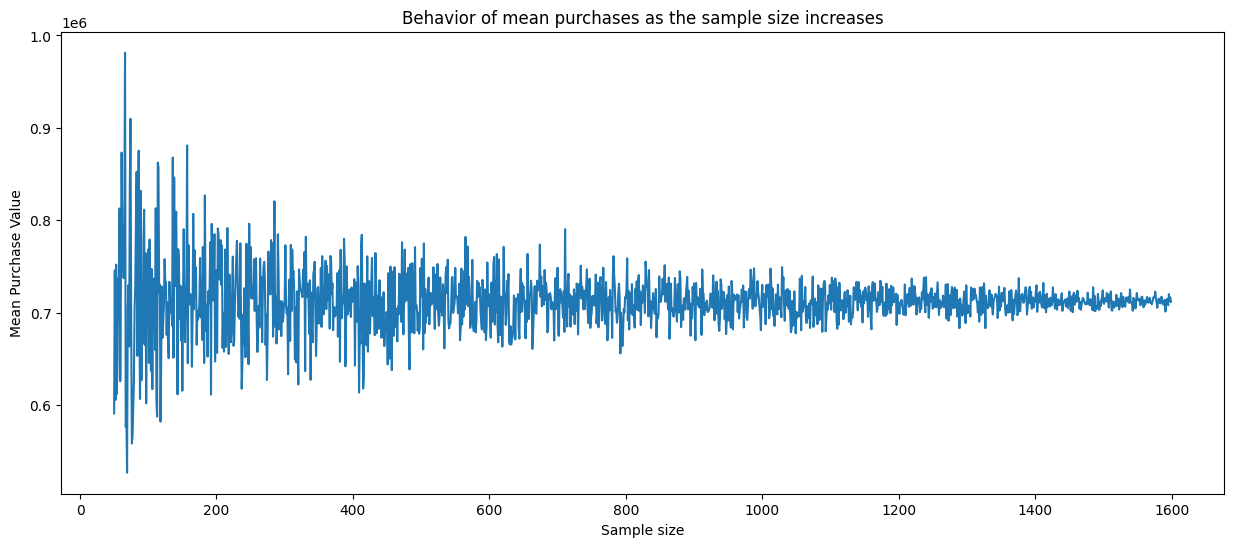

In [73]:
plt.figure(figsize = (15, 6))
plt.title('Behavior of mean purchases as the sample size increases')
plt.plot(np.arange(50, 1600), mean_purchases)
plt.xlabel('Sample size')
plt.ylabel('Mean Purchase Value')
plt.plot()

**Finding the confidence interval of each female's total spending on the Black Friday**

In [74]:
means_female = []
size = df_female_customer['Total_Purchase'].shape[0]
for bootstrapped_sample in range(10000):
    sample_mean = df_female_customer['Total_Purchase'].sample(size, replace = True).mean()
    means_female.append(sample_mean)

[]

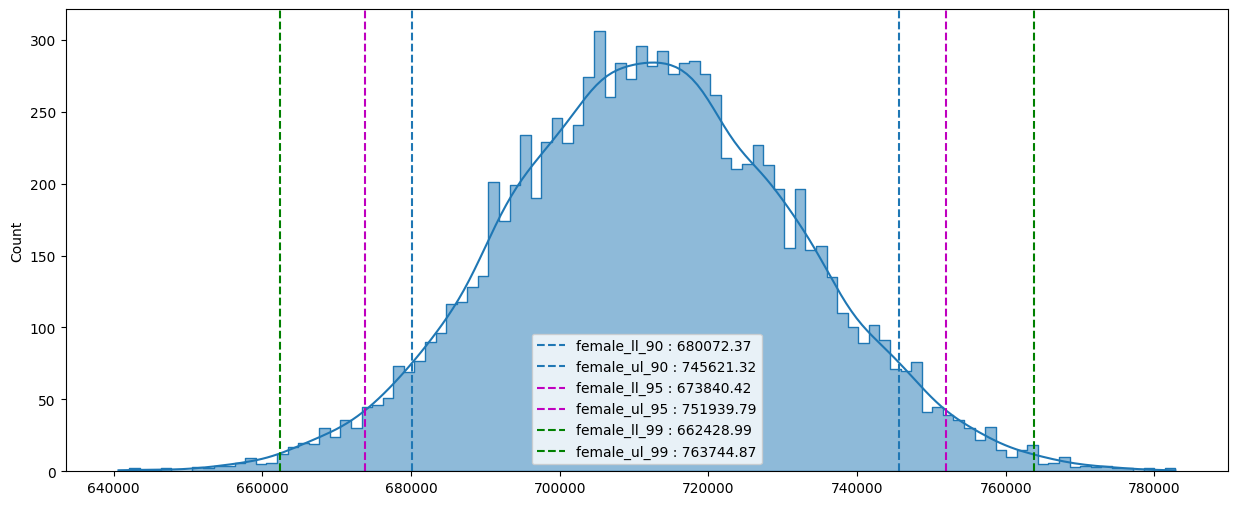

In [75]:
# The below code generates a histogram plot with kernel density estimation and
    # adds vertical lines to represent confidence intervals at 90%, 95%, and 99% level

plt.figure(figsize = (15, 6))     # setting the figure size of the plot

sns.histplot(means_female, kde = True, bins = 100, fill = True, element = 'step')

# Above line plots a histogram of the data contained in the `means_female` variable.
    # The `kde=True` argument adds a kernel density estimation line to the plot.
    # The `bins=100` argument sets the number of bins for the histogram


# Above line calculates the z-score corresponding to the 90% confidence level using the
    # inverse of the cumulative distribution function (CDF) of a standard normal distribution

female_ll_90 = np.percentile(means_female, 5)
    # calculating the lower limit of the 90% confidence interval
female_ul_90 = np.percentile(means_female, 95)
    # calculating the upper limit of the 90% confidence interval
plt.axvline(female_ll_90, label = f'female_ll_90 : {round(female_ll_90, 2)}', linestyle = '--')
    # adding a vertical line at the lower limit of the 90% confidence interval
plt.axvline(female_ul_90, label = f'female_ul_90 : {round(female_ul_90, 2)}', linestyle = '--')
    # adding a vertical line at the upper limit of the 90% confidence interval

# Similar steps are repeated for calculating and plotting the 95% and 99% confidence intervals,
    # with different line colors (`color='m'` for 95% and `color='g'` for 99%)

female_ll_95 = np.percentile(means_female, 2.5)
female_ul_95 = np.percentile(means_female, 97.5)
plt.axvline(female_ll_95, label = f'female_ll_95 : {round(female_ll_95, 2)}', linestyle = '--', color = 'm')
plt.axvline(female_ul_95, label = f'female_ul_95 : {round(female_ul_95, 2)}', linestyle = '--', color = 'm')


female_ll_99 = np.percentile(means_female, 0.5)
female_ul_99 = np.percentile(means_female, 99.5)
plt.axvline(female_ll_99, label = f'female_ll_99 : {round(female_ll_99, 2)}', linestyle = '--', color = 'g')
plt.axvline(female_ul_99, label = f'female_ul_99 : {round(female_ul_99, 2)}', linestyle = '--', color = 'g')

plt.legend()     # displaying a legend for the plotted lines.
plt.plot()       # displaying the plot.

 - Through the bootstrapping method, we have been able to estimate the confidence interval for the total purchase made by each female customer on Black Friday at Walmart, despite having data for only 1666 female individuals. This provides us with a reasonable approximation of the range within which the total purchase of each female customer falls, with a certain level of confidence.

In [76]:
print(f"The population mean of total spending of each female will be approximately = {np.round(np.mean(means_female), 2)} ")

The population mean of total spending of each female will be approximately = 712405.63 


### **Comparison of distributions of male's total purchase amount and female's total purchase amount**

[]

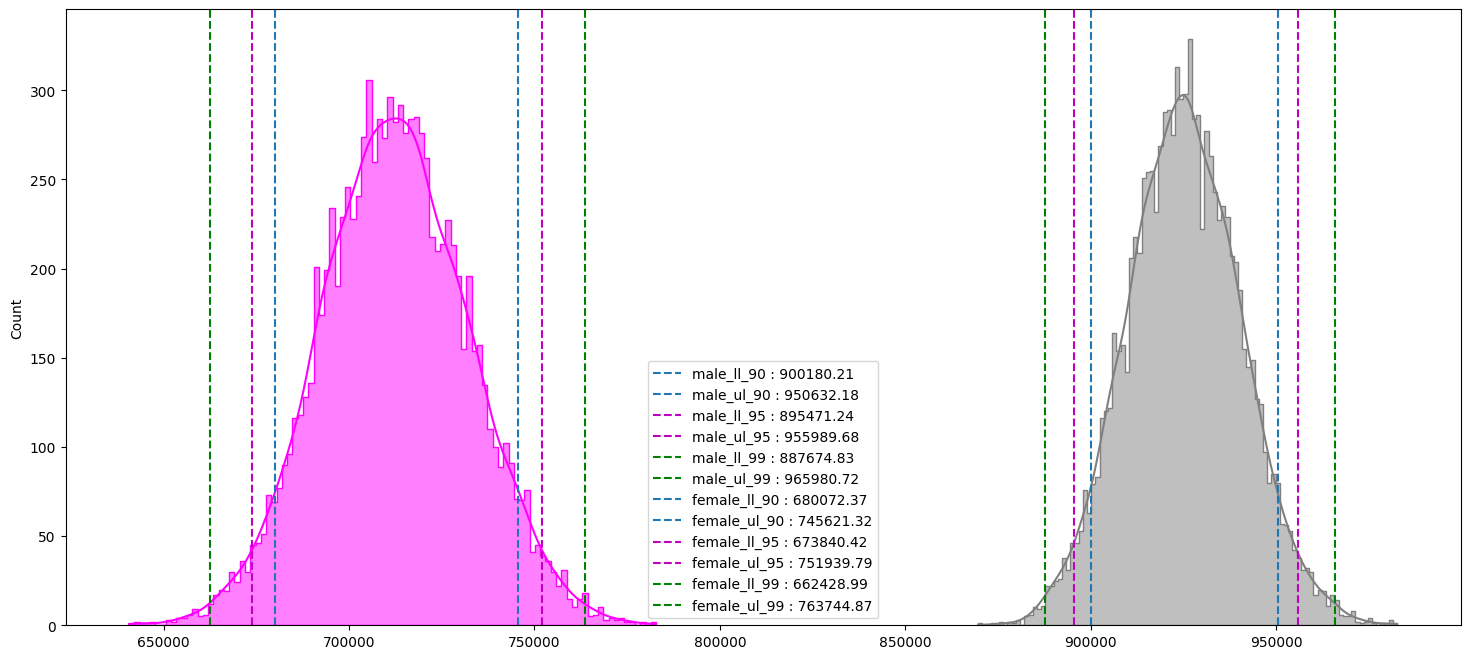

In [77]:
# The code generates a histogram plot to visualize the distributions of means_male and means_female,
    # along with vertical lines indicating confidence interval limits at different confidence levels

plt.figure(figsize = (18, 8))

# The first histogram represents the distribution of means_male with gray color having
    # KDE (Kernel Density Estimation) curves enabled for smooth representation.
sns.histplot(means_male,
             kde = True,
             bins = 100,
             fill = True,
             element = 'step',
             color = 'gray',
             legend = True)

# Multiple vertical lines are plotted to represent the lower and upper limits
    # for confidence intervals at different confidence levels
plt.axvline(male_ll_90, label = f'male_ll_90 : {round(male_ll_90, 2)}', linestyle = '--')
plt.axvline(male_ul_90, label = f'male_ul_90 : {round(male_ul_90, 2)}', linestyle = '--')
plt.axvline(male_ll_95, label = f'male_ll_95 : {round(male_ll_95, 2)}', linestyle = '--', color = 'm')
plt.axvline(male_ul_95, label = f'male_ul_95 : {round(male_ul_95, 2)}', linestyle = '--', color = 'm')
plt.axvline(male_ll_99, label = f'male_ll_99 : {round(male_ll_99, 2)}', linestyle = '--', color = 'g')
plt.axvline(male_ul_99, label = f'male_ul_99 : {round(male_ul_99, 2)}', linestyle = '--', color = 'g')

# The second histogram represents the distribution of means_female with magenta color
    # KDE (Kernel Density Estimation) curves enabled for smooth representation.
sns.histplot(means_female,
             kde = True,
             bins = 100,
             fill = True,
             element = 'step',
             color = 'magenta',
             legend = True)

# Multiple vertical lines are plotted to represent the lower and upper limits
    # for confidence intervals at different confidence levels
plt.axvline(female_ll_90, label = f'female_ll_90 : {round(female_ll_90, 2)}', linestyle = '--')
plt.axvline(female_ul_90, label = f'female_ul_90 : {round(female_ul_90, 2)}', linestyle = '--')
plt.axvline(female_ll_95, label = f'female_ll_95 : {round(female_ll_95, 2)}', linestyle = '--', color = 'm')
plt.axvline(female_ul_95, label = f'female_ul_95 : {round(female_ul_95, 2)}', linestyle = '--', color = 'm')
plt.axvline(female_ll_99, label = f'female_ll_99 : {round(female_ll_99, 2)}', linestyle = '--', color = 'g')
plt.axvline(female_ul_99, label = f'female_ul_99 : {round(female_ul_99, 2)}', linestyle = '--', color = 'g')

plt.legend()
plt.plot()

It can be clearly seen from the above chart that the distribution of males' total purchase amount lies well towards the right of females' total purchase amount. We can conclude that, on average, males tend to spend more on purchases compared to females. This observation suggests a potential difference in spending behavior between genders.

There could be several reasons why males are spending more than females:

 - **Product preferences**: Males may have a higher tendency to purchase products that are generally more expensive or fall into higher price categories. This could include items such as electronics, gadgets, or luxury goods.

 - **Income disparity**: There may be an income disparity between males and females, with males having higher earning potential or occupying higher-paying job roles. This can lead to a difference in purchasing power and ability to spend more on products.

 - **Consumption patterns**: Males might exhibit different consumption patterns, such as being more inclined towards hobbies or interests that require higher spending, such as sports equipment, gaming, or collectibles.

 - **Marketing and advertising targeting**: Advertisers and marketers may target males with products or services that are positioned at higher price points. This targeted marketing approach can influence purchasing decisions and contribute to males spending more.

It's important to note that these reasons are general observations and may not apply universally. Individual preferences, personal financial situations, and various other factors can also influence spending patterns.

## **Determining the mean purchase made by each user belonging to different Marital Status**

In [78]:
df_single=df.loc[df["Marital_Status"]=="Single"]
df_married=df.loc[df["Marital_Status"]=="Married"]

In [79]:
df_single = df_single.groupby('User_ID')['Purchase'].sum().to_frame().reset_index().rename(columns = {'Purchase' : 'Total_Purchase'})
df_married = df_married.groupby('User_ID')['Purchase'].sum().to_frame().reset_index().rename(columns = {'Purchase' : 'Total_Purchase'})

## **For Singles**

In [80]:
df_single

,User_ID,Total_Purchase
0,1000001,334093
1,1000002,810472
2,1000003,341635
3,1000006,379930
4,1000009,594099
...,...,...
3412,1006034,197086
3413,1006035,956645
3414,1006037,1119538
3415,1006038,90034


In [81]:
mean_purchases=[]
for sample_size in range(50,3000):
  sample_mean= df_single["Total_Purchase"].sample(sample_size).mean()
  mean_purchases.append(sample_mean)

[]

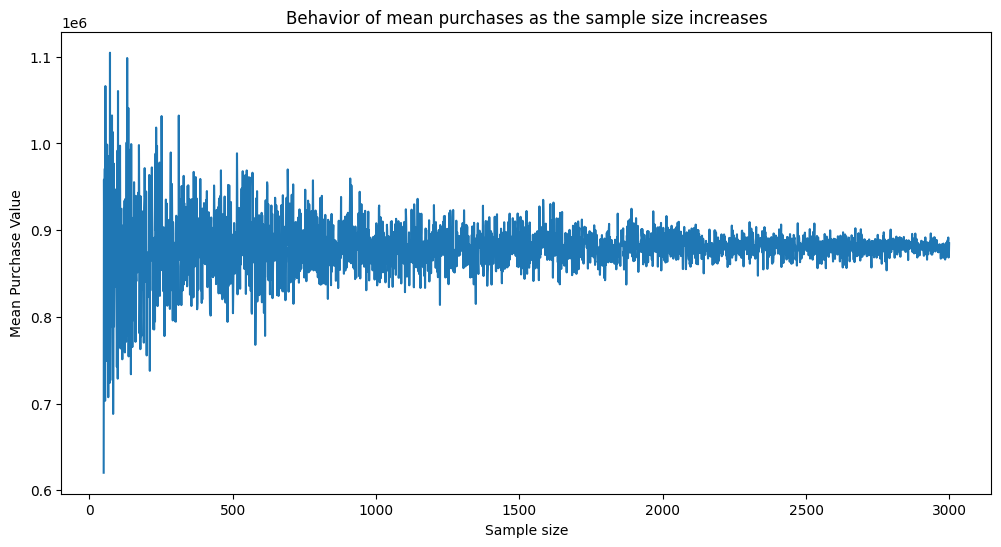

In [82]:
plt.figure(figsize = (12, 6))
plt.title('Behavior of mean purchases as the sample size increases')
plt.plot(np.arange(50, 3000), mean_purchases)
plt.xlabel('Sample size')
plt.ylabel('Mean Purchase Value')
plt.plot()

**Finding the confidence interval of each single's total spending on the Black Friday**

In [83]:
single_means=[]
size= df_single["Total_Purchase"].shape[0]
for bootstrapped_sample in range(10000):
  sample_mean=df_single["Total_Purchase"].sample(size,replace=True).mean()
  single_means.append(sample_mean)

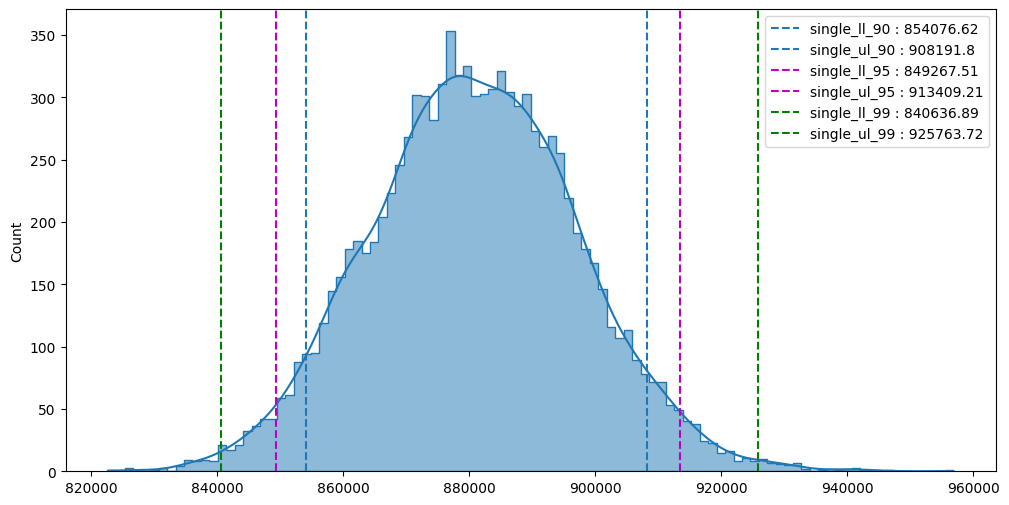

In [84]:
plt.figure(figsize=(12,6))
sns.histplot(single_means, kde=True, bins=100, fill=True, element= "step")

single_ll_90=np.percentile(single_means,5)
single_ul_90=np.percentile(single_means,95)
plt.axvline(single_ll_90, label = f'single_ll_90 : {round(single_ll_90, 2)}', linestyle = '--')
plt.axvline(single_ul_90, label = f'single_ul_90 : {round(single_ul_90, 2)}', linestyle = '--')

single_ll_95=np.percentile(single_means,2.5)
single_ul_95=np.percentile(single_means,97.5)
plt.axvline(single_ll_95, label = f'single_ll_95 : {round(single_ll_95, 2)}', linestyle = '--',color="m")
plt.axvline(single_ul_95, label = f'single_ul_95 : {round(single_ul_95, 2)}', linestyle = '--',color="m")

single_ll_99=np.percentile(single_means,0.5)
single_ul_99=np.percentile(single_means,99.5)
plt.axvline(single_ll_99, label = f'single_ll_99 : {round(single_ll_99, 2)}', linestyle = '--',color="g")
plt.axvline(single_ul_99, label = f'single_ul_99 : {round(single_ul_99, 2)}', linestyle = '--',color="g")

plt.legend()
plt.show()

In [85]:
print(f"The population mean of total spending of each single will be approximately = {np.round(np.mean(single_means), 2)} ")

The population mean of total spending of each single will be approximately = 880833.45 


## **For Married**

In [86]:
df_married

,User_ID,Total_Purchase
0,1000004,206468
1,1000005,821001
2,1000007,234668
3,1000008,796593
4,1000010,2169510
...,...,...
2469,1006029,157436
2470,1006030,737361
2471,1006033,501843
2472,1006036,4116058


In [87]:
mean_purchases = []
for sample_size in range(50, 2000):
    sample_mean = df_married['Total_Purchase'].sample(sample_size).mean()
    mean_purchases.append(sample_mean)

[]

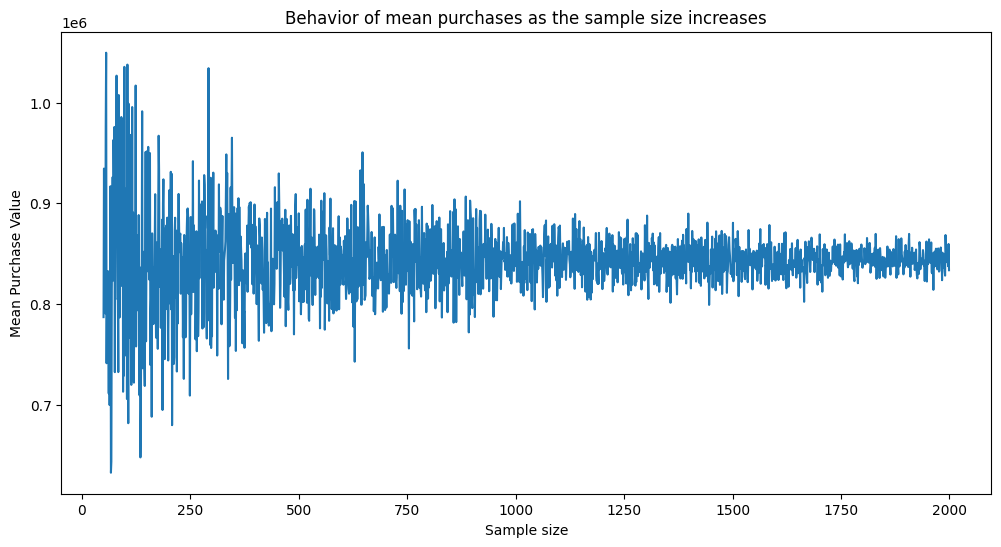

In [88]:
plt.figure(figsize = (12, 6))
plt.title('Behavior of mean purchases as the sample size increases')
plt.plot(np.arange(50, 2000), mean_purchases)
plt.xlabel('Sample size')
plt.ylabel('Mean Purchase Value')
plt.plot()

In [89]:
married_means = []
size = df_married['Total_Purchase'].shape[0]
for bootstrapped_sample in range(10000):
    sample_mean = df_married['Total_Purchase'].sample(size, replace = True).mean()
    married_means.append(sample_mean)

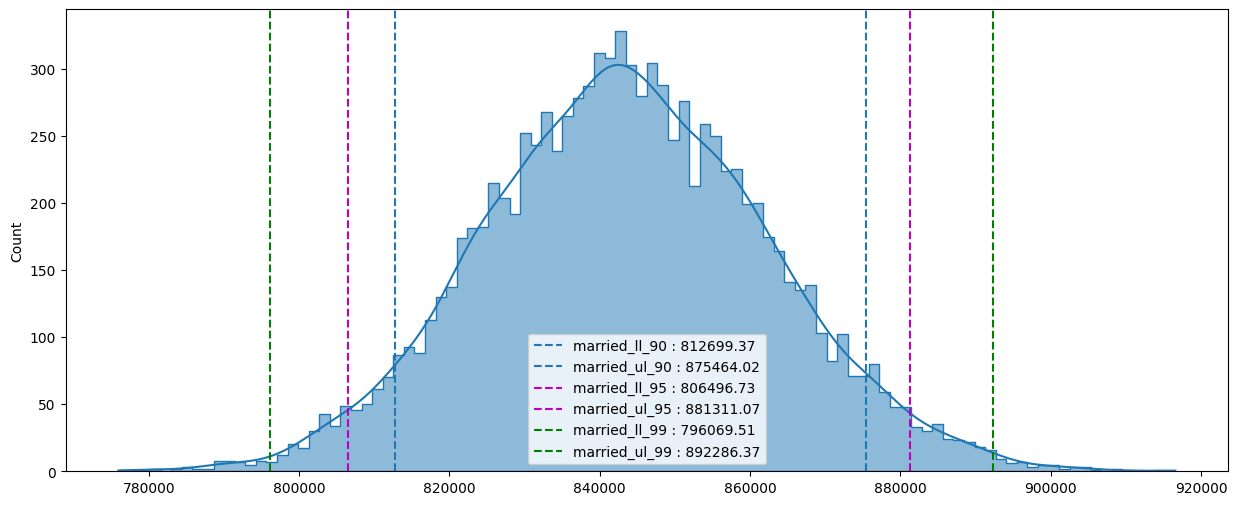

In [90]:
plt.figure(figsize = (15, 6))
sns.histplot(married_means, kde = True, bins = 100, fill = True, element = 'step')

married_ll_90 = np.percentile(married_means, 5)
married_ul_90 = np.percentile(married_means, 95)
plt.axvline(married_ll_90, label = f'married_ll_90 : {round(married_ll_90, 2)}', linestyle = '--')
plt.axvline(married_ul_90, label = f'married_ul_90 : {round(married_ul_90, 2)}', linestyle = '--')

married_ll_95 = np.percentile(married_means, 2.5)
married_ul_95 = np.percentile(married_means, 97.5)
plt.axvline(married_ll_95, label = f'married_ll_95 : {round(married_ll_95, 2)}', linestyle = '--', color = 'm')
plt.axvline(married_ul_95, label = f'married_ul_95 : {round(married_ul_95, 2)}', linestyle = '--', color = 'm')

married_ll_99 = np.percentile(married_means, 0.5)
married_ul_99 = np.percentile(married_means, 99.5)
plt.axvline(married_ll_99, label = f'married_ll_99 : {round(married_ll_99, 2)}', linestyle = '--', color = 'g')
plt.axvline(married_ul_99, label = f'married_ul_99 : {round(married_ul_99, 2)}', linestyle = '--', color = 'g')

plt.legend()
plt.show()

 - Through the bootstrapping method, we have been able to estimate the confidence interval for the total purchase made by each married customer on Black Friday at Walmart, despite having data for only 2474 individuals having married as marital status. This provides us with a reasonable approximation of the range within which the total purchase of each married customer falls, with a certain level of confidence.

In [137]:
print(f"The population mean of total spending of each married will be approximately = {np.round(np.mean(married_means), 2)} ")

The population mean of total spending of each married will be approximately = 843499.34 


### **Comparison of distributions of single's total purchase amount and married's total purchase amount**

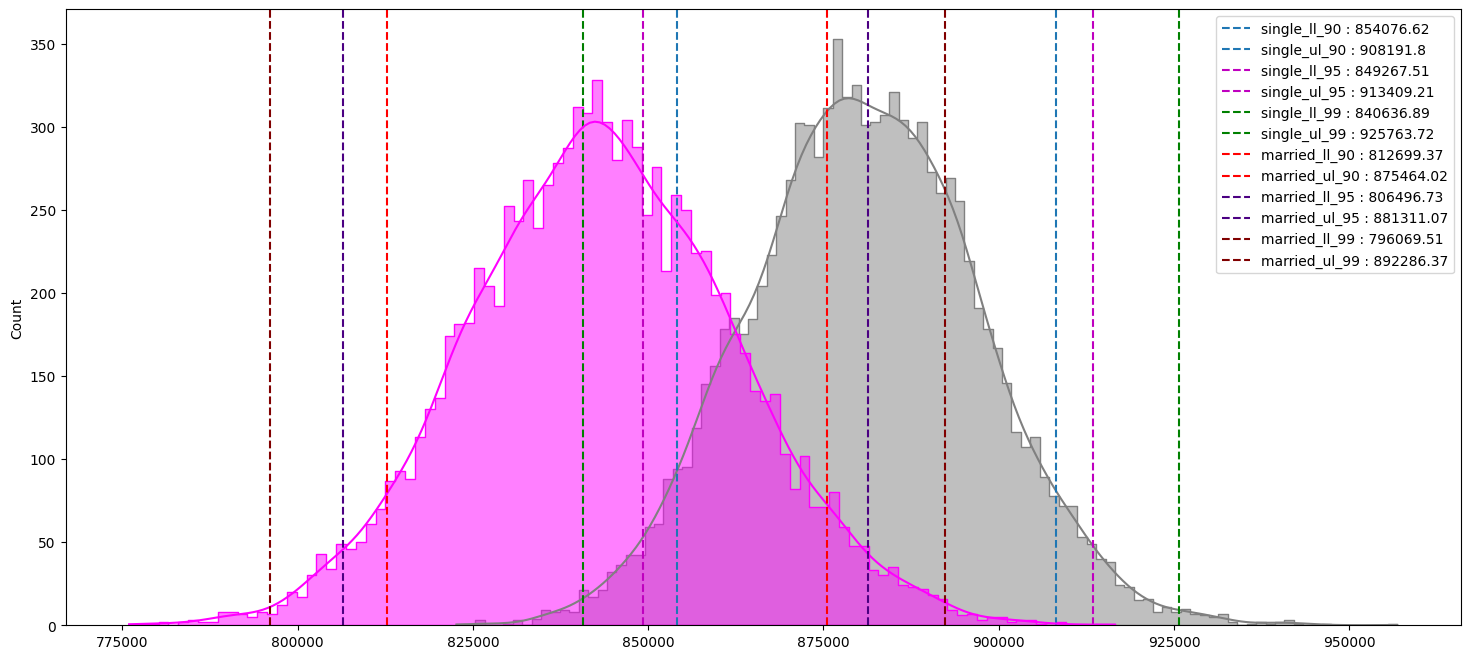

In [92]:
plt.figure(figsize = (18, 8))
sns.histplot(single_means,
             kde = True,
             bins = 100,
             fill = True,
             element = 'step',
             color = 'gray',
             legend = True)

plt.axvline(single_ll_90, label = f'single_ll_90 : {round(single_ll_90, 2)}', linestyle = '--')
plt.axvline(single_ul_90, label = f'single_ul_90 : {round(single_ul_90, 2)}', linestyle = '--')
plt.axvline(single_ll_95, label = f'single_ll_95 : {round(single_ll_95, 2)}', linestyle = '--', color = 'm')
plt.axvline(single_ul_95, label = f'single_ul_95 : {round(single_ul_95, 2)}', linestyle = '--', color = 'm')
plt.axvline(single_ll_99, label = f'single_ll_99 : {round(single_ll_99, 2)}', linestyle = '--', color = 'g')
plt.axvline(single_ul_99, label = f'single_ul_99 : {round(single_ul_99, 2)}', linestyle = '--', color = 'g')

sns.histplot(married_means,
             kde = True,
             bins = 100,
             fill = True,
             element = 'step',
             color = 'magenta',
             legend = True)

plt.axvline(married_ll_90, label = f'married_ll_90 : {round(married_ll_90, 2)}', linestyle = '--', color = 'r')
plt.axvline(married_ul_90, label = f'married_ul_90 : {round(married_ul_90, 2)}', linestyle = '--', color = 'r')
plt.axvline(married_ll_95, label = f'married_ll_95 : {round(married_ll_95, 2)}', linestyle = '--', color = 'indigo')
plt.axvline(married_ul_95, label = f'married_ul_95 : {round(married_ul_95, 2)}', linestyle = '--', color = 'indigo')
plt.axvline(married_ll_99, label = f'married_ll_99 : {round(married_ll_99, 2)}', linestyle = '--', color = 'maroon')
plt.axvline(married_ul_99, label = f'married_ul_99 : {round(married_ul_99, 2)}', linestyle = '--', color = 'maroon')

plt.legend()
plt.show()

It can be inferred from the above chart that the distributions of singles' total spending and married individuals' total spending overlap. It suggests that there is no significant difference in spending habits between these two groups. Here are some possible inferences that can be drawn from this:

 - **Relationship status does not strongly influence spending**: Being single or married does not appear to have a substantial impact on individuals' spending patterns. Other factors such as income, personal preferences, and financial priorities may play a more significant role in determining spending habits.

 - **Similar consumption patterns**: Singles and married individuals may have similar lifestyles and consumption patterns, leading to comparable spending behaviors. They may allocate their income in comparable ways, making similar purchasing decisions and spending on similar categories of products or services.

 - **Financial considerations**: Both singles and married individuals may have similar financial responsibilities and constraints, leading to similar spending levels. They may have similar obligations such as housing costs, bills, and other financial commitments, which influence their overall spending capacity.

 - **Individual differences outweigh relationship status**: Other individual characteristics, such as personal values, interests, and financial habits, may have a more significant impact on spending behavior than relationship status. These factors can vary widely within each group, resulting in overlapping spending distributions.

### **Determining the mean purchase made by each user based on their age groups:**

In [93]:
print(df['Age'].unique())
df_age_0_to_17 = df.loc[df['Age'] == '0-17']
df_age_18_to_25 = df.loc[df['Age'] == '18-25']
df_age_26_to_35 = df.loc[df['Age'] == '26-35']
df_age_36_to_45 = df.loc[df['Age'] == '36-45']
df_age_46_to_50 = df.loc[df['Age'] == '46-50']
df_age_51_to_55 = df.loc[df['Age'] == '51-55']
df_age_above_55 = df.loc[df['Age'] == '55+']

['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25']
Categories (7, object): ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']


In [94]:
df_age_0_to_17 = df_age_0_to_17.groupby(by = 'User_ID')['Purchase'].sum().to_frame().reset_index().rename(columns = {'Purchase' : 'Total_Purchase'})
df_age_18_to_25 = df_age_18_to_25.groupby(by = 'User_ID')['Purchase'].sum().to_frame().reset_index().rename(columns = {'Purchase' : 'Total_Purchase'})
df_age_26_to_35 = df_age_26_to_35.groupby(by = 'User_ID')['Purchase'].sum().to_frame().reset_index().rename(columns = {'Purchase' : 'Total_Purchase'})
df_age_36_to_45 = df_age_36_to_45.groupby(by = 'User_ID')['Purchase'].sum().to_frame().reset_index().rename(columns = {'Purchase' : 'Total_Purchase'})
df_age_46_to_50 = df_age_46_to_50.groupby(by = 'User_ID')['Purchase'].sum().to_frame().reset_index().rename(columns = {'Purchase' : 'Total_Purchase'})
df_age_51_to_55 = df_age_51_to_55.groupby(by = 'User_ID')['Purchase'].sum().to_frame().reset_index().rename(columns = {'Purchase' : 'Total_Purchase'})
df_age_above_55 = df_age_above_55.groupby(by = 'User_ID')['Purchase'].sum().to_frame().reset_index().rename(columns = {'Purchase' : 'Total_Purchase'})

### **For Age Group 0 - 17 years**


In [95]:
df_age_0_to_17

,User_ID,Total_Purchase
0,1000001,334093
1,1000019,1458069
2,1000051,200772
3,1000075,1035584
4,1000086,294063
...,...,...
213,1005844,476231
214,1005953,629161
215,1005973,270475
216,1005989,466195


In [96]:
mean_purchases=[]
for sample_size in range(50,200):
  sample_mean=df_age_0_to_17["Total_Purchase"].sample(sample_size).mean()
  mean_purchases.append(sample_mean)

[]

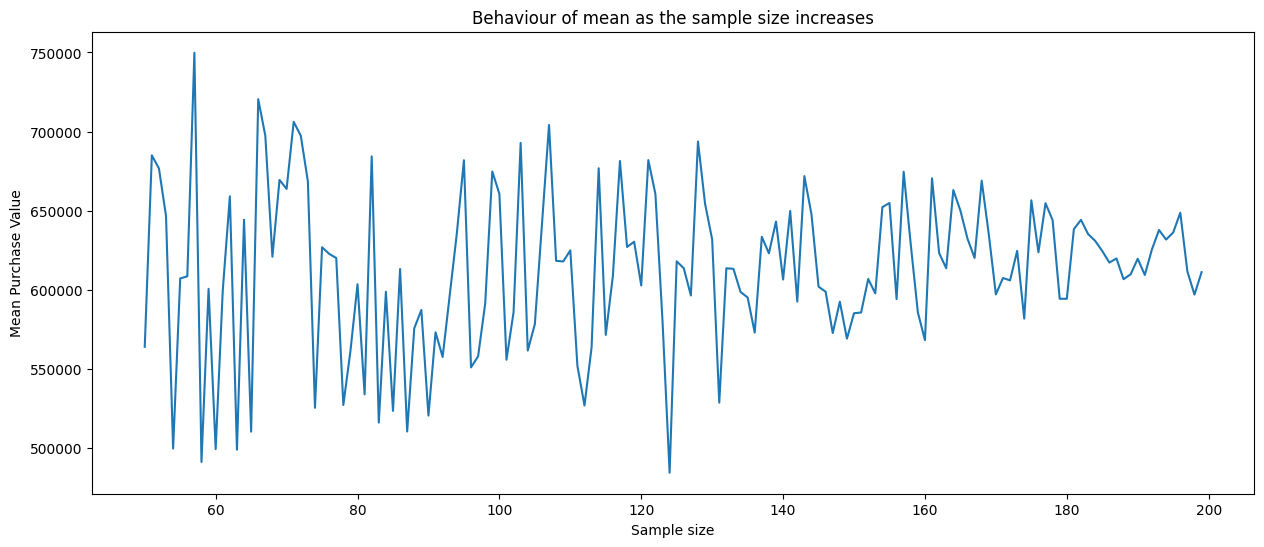

In [97]:
plt.figure(figsize=(15,6))
plt.title("Behaviour of mean as the sample size increases")
plt.plot(np.arange(50,200),mean_purchases)
plt.xlabel('Sample size')
plt.ylabel('Mean Purchase Value')
plt.plot()

### **Finding the confidence interval of total spending for each individual in the age group 0 - 17 on the Black Friday**

In [98]:
means=[]
size=df_age_0_to_17["Total_Purchase"].shape[0]
for bootstrapped_sample in range(10000):
  sample_mean=df_age_0_to_17["Total_Purchase"].sample(size, replace=True).mean()
  means.append(sample_mean)

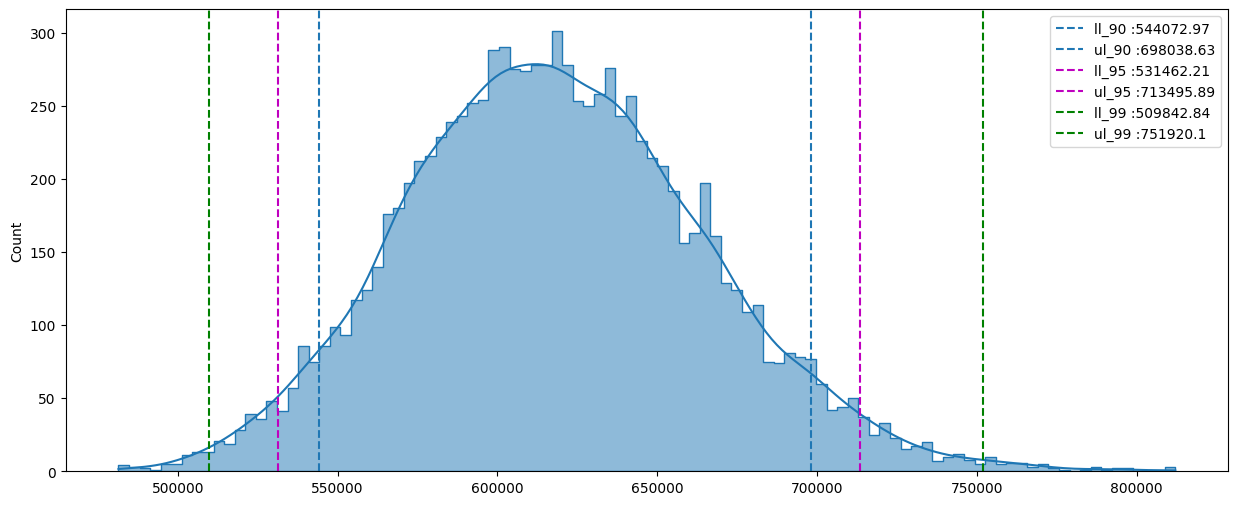

In [99]:
plt.figure(figsize=(15,6))
sns.histplot(means, kde=True, bins=100, fill=True, element="step")
ll_90=np.percentile(means,5)
ul_90=np.percentile(means,95)
plt.axvline(ll_90, label=f'll_90 :{round(ll_90,2)}', linestyle="--")
plt.axvline(ul_90, label=f'ul_90 :{round(ul_90,2)}', linestyle="--")

ll_95=np.percentile(means,2.5)
ul_95=np.percentile(means,97.5)
plt.axvline(ll_95, label=f'll_95 :{round(ll_95,2)}', linestyle="--",color="m")
plt.axvline(ul_95, label=f'ul_95 :{round(ul_95,2)}', linestyle="--",color="m")

ll_99=np.percentile(means,0.5)
ul_99=np.percentile(means,99.5)
plt.axvline(ll_99, label=f'll_99 :{round(ll_99,2)}', linestyle="--",color="g")
plt.axvline(ul_99, label=f'ul_99 :{round(ul_99,2)}', linestyle="--",color="g")

plt.legend()
plt.show()

 - Through the bootstrapping method, we have been able to estimate the confidence interval for the total purchase made by each individual in age group 0 - 17 years on Black Friday at Walmart, despite having data for only 218 individuals having age group 0 - 17 years. This provides us with a reasonable approximation of the range within which the total purchase of each individuals having age group 0 - 17 years falls, with a certain level of confidence.

In [100]:
print(f"The population mean of total spending of each customer in age group 0 -17 will be approximately = {np.round(np.mean(means),2)}")

The population mean of total spending of each customer in age group 0 -17 will be approximately = 618195.42


### **For Age Group 18 - 25 years**

In [101]:
df_age_18_to_25

,User_ID,Total_Purchase
0,1000018,1979047
1,1000021,127099
2,1000022,1279914
3,1000025,534706
4,1000034,807983
...,...,...
1064,1005998,702901
1065,1006008,266306
1066,1006027,265201
1067,1006028,362972


### **How the deviations vary for different sample sizes ?**

In [102]:
mean_purchases = []
for sample_size in range(50, 1000):
    sample_mean = df_age_18_to_25['Total_Purchase'].sample(sample_size).mean()
    mean_purchases.append(sample_mean)

[]

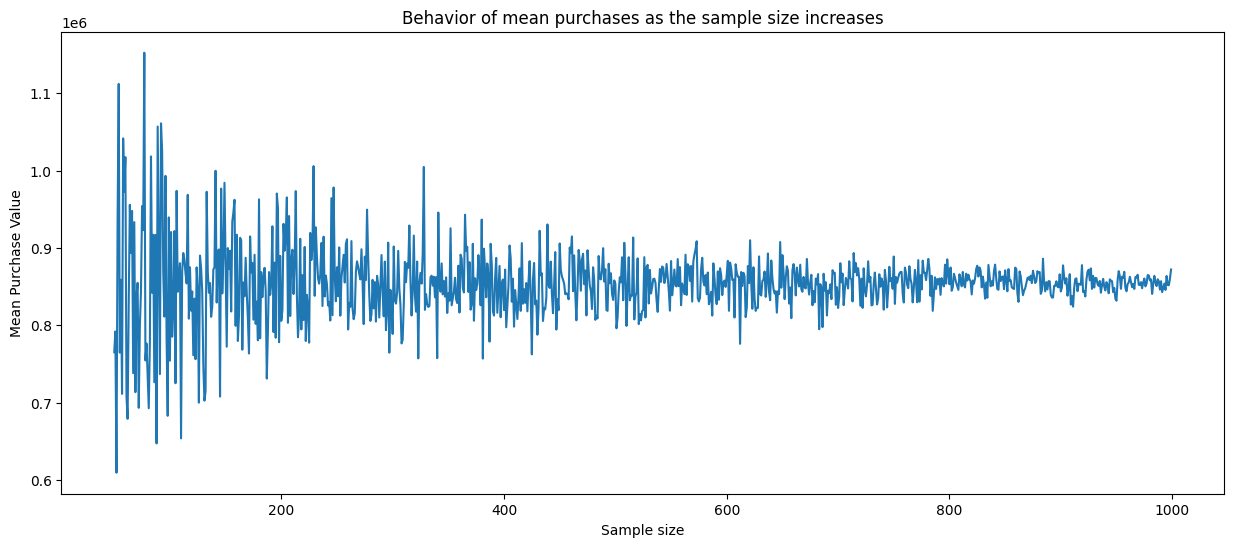

In [103]:
plt.figure(figsize = (15, 6))
plt.title('Behavior of mean purchases as the sample size increases')
plt.plot(np.arange(50, 1000), mean_purchases)
plt.xlabel('Sample size')
plt.ylabel('Mean Purchase Value')
plt.plot()

### **Finding the confidence interval of total spending for each individual in the age group 18 - 25 on the Black Friday**

In [104]:
means = []
size = df_age_18_to_25['Total_Purchase'].shape[0]
for bootstrapped_sample in range(10000):
    sample_mean = df_age_18_to_25['Total_Purchase'].sample(size, replace = True).mean()
    means.append(sample_mean)

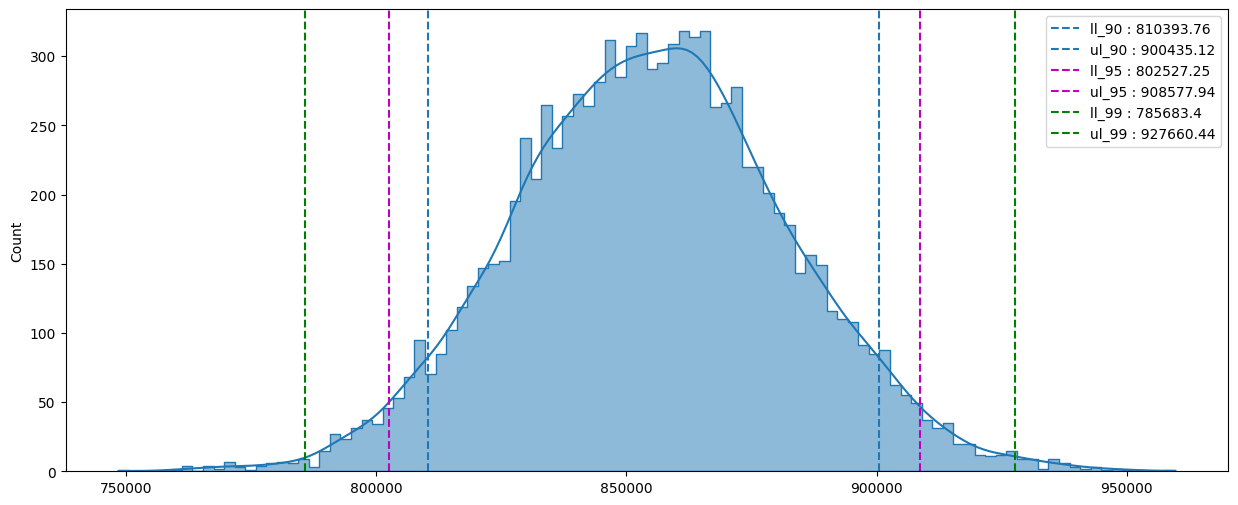

In [105]:
plt.figure(figsize = (15, 6))
sns.histplot(means, kde = True, bins = 100, fill = True, element = 'step')

ll_90 = np.percentile(means, 5)
ul_90 = np.percentile(means, 95)
plt.axvline(ll_90, label = f'll_90 : {round(ll_90, 2)}', linestyle = '--')
plt.axvline(ul_90, label = f'ul_90 : {round(ul_90, 2)}', linestyle = '--')

ll_95 = np.percentile(means, 2.5)
ul_95 = np.percentile(means, 97.5)
plt.axvline(ll_95, label = f'll_95 : {round(ll_95, 2)}', linestyle = '--', color = 'm')
plt.axvline(ul_95, label = f'ul_95 : {round(ul_95, 2)}', linestyle = '--', color = 'm')


ll_99 = np.percentile(means, 0.5)
ul_99 = np.percentile(means, 99.5)
plt.axvline(ll_99, label = f'll_99 : {round(ll_99, 2)}', linestyle = '--', color = 'g')
plt.axvline(ul_99, label = f'ul_99 : {round(ul_99, 2)}', linestyle = '--', color = 'g')

plt.legend()
plt.show()

 - Through the bootstrapping method, we have been able to estimate the confidence interval for the total purchase made by each individual in age group 18 - 25 years on Black Friday at Walmart, despite having data for only 1069 individuals having age group 18 - 25 years. This provides us with a reasonable approximation of the range within which the total purchase of each individuals having age group 18 - 25 years falls, with a certain level of confidence.

In [106]:
print(f"The population mean of total spending of each customer in age group 18 -25 will be approximately = {np.round(np.mean(means),2)}")

The population mean of total spending of each customer in age group 18 -25 will be approximately = 855010.09


### **For Age Group 26 - 35 years**

In [107]:
df_age_26_to_35

,User_ID,Total_Purchase
0,1000003,341635
1,1000005,821001
2,1000008,796593
3,1000009,594099
4,1000011,557023
...,...,...
2048,1006030,737361
2049,1006034,197086
2050,1006035,956645
2051,1006036,4116058


### **How the deviations vary for different sample sizes ?**

In [108]:
mean_purchases = []
for sample_size in range(50, 2000):
    sample_mean = df_age_26_to_35['Total_Purchase'].sample(sample_size).mean()
    mean_purchases.append(sample_mean)

[]

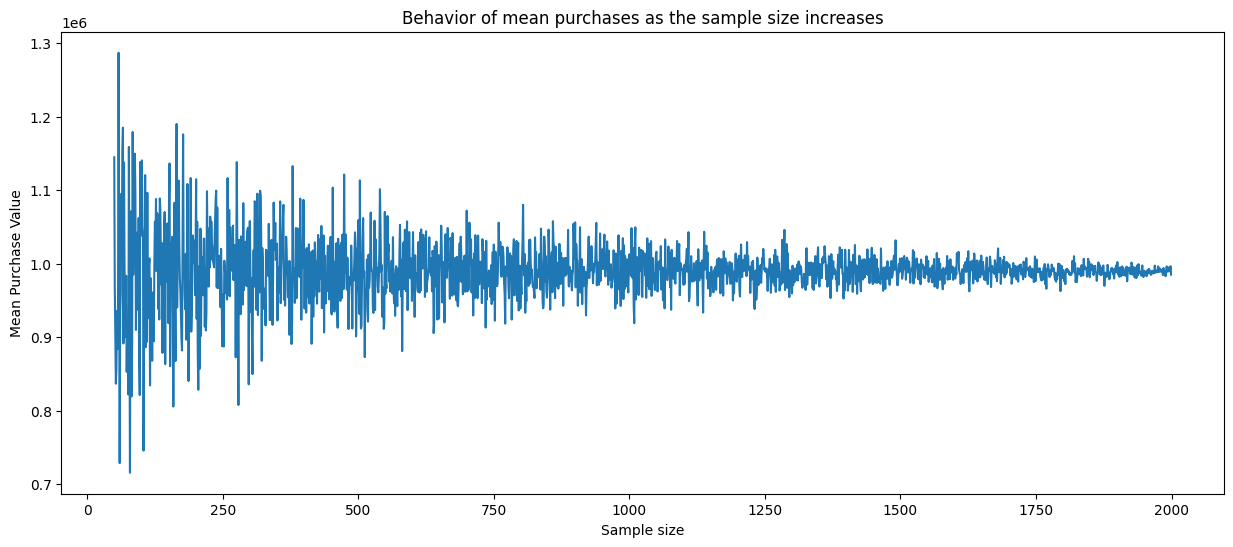

In [109]:
plt.figure(figsize = (15, 6))
plt.title('Behavior of mean purchases as the sample size increases')
plt.plot(np.arange(50, 2000), mean_purchases)
plt.xlabel('Sample size')
plt.ylabel('Mean Purchase Value')
plt.plot()

### **Finding the confidence interval of total spending for each individual in the age group 26 - 35 on the Black Friday**

In [110]:
means = []
size = df_age_26_to_35['Total_Purchase'].shape[0]
for bootstrapped_sample in range(10000):
    sample_mean = df_age_26_to_35['Total_Purchase'].sample(size, replace = True).mean()
    means.append(sample_mean)

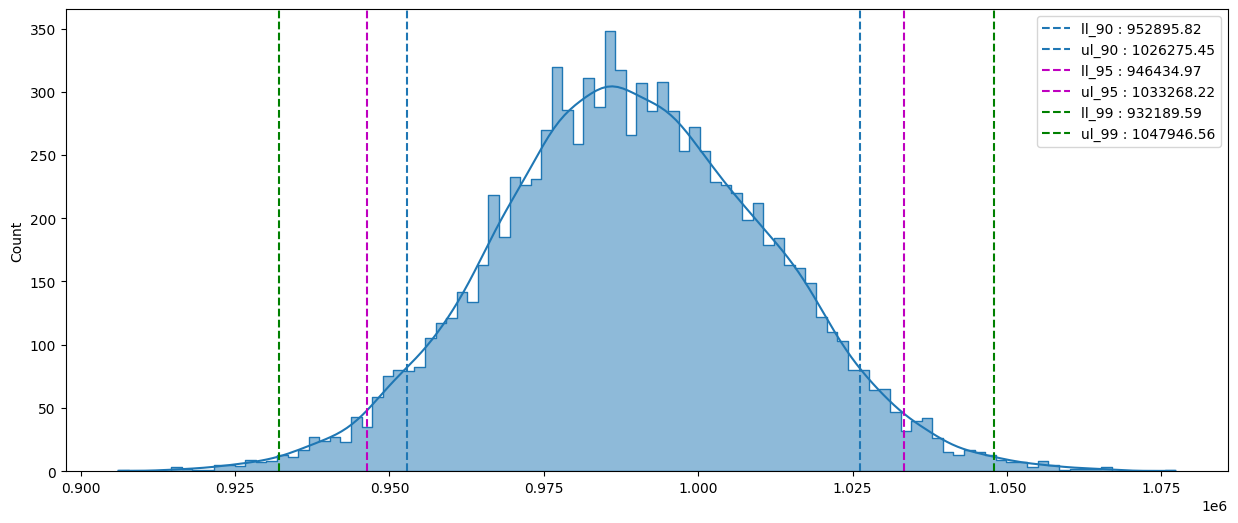

In [111]:
plt.figure(figsize = (15, 6))
sns.histplot(means, kde = True, bins = 100, fill = True, element = 'step')

ll_90 = np.percentile(means, 5)
ul_90 = np.percentile(means, 95)
plt.axvline(ll_90, label = f'll_90 : {round(ll_90, 2)}', linestyle = '--')
plt.axvline(ul_90, label = f'ul_90 : {round(ul_90, 2)}', linestyle = '--')

ll_95 = np.percentile(means, 2.5)
ul_95 = np.percentile(means, 97.5)
plt.axvline(ll_95, label = f'll_95 : {round(ll_95, 2)}', linestyle = '--', color = 'm')
plt.axvline(ul_95, label = f'ul_95 : {round(ul_95, 2)}', linestyle = '--', color = 'm')


ll_99 = np.percentile(means, 0.5)
ul_99 = np.percentile(means, 99.5)
plt.axvline(ll_99, label = f'll_99 : {round(ll_99, 2)}', linestyle = '--', color = 'g')
plt.axvline(ul_99, label = f'ul_99 : {round(ul_99, 2)}', linestyle = '--', color = 'g')

plt.legend()
plt.show()

  - Through the bootstrapping method, we have been able to estimate the confidence interval for the total purchase made by each individual in age group 26 - 35 years on Black Friday at Walmart, despite having data for only 2053 individuals having age group 26 - 35 years. This provides us with a reasonable approximation of the range within which the total purchase of each individuals having age group 26 - 35 years falls, with a certain level of confidence.

In [112]:
print(f"The population mean of total spending of each customer in age group 26 -35 will be approximately = {np.round(np.mean(means),2)}")

The population mean of total spending of each customer in age group 26 -35 will be approximately = 989411.24


### **For Age Group 36 - 45 years**

In [113]:
df_age_36_to_45

,User_ID,Total_Purchase
0,1000007,234668
1,1000010,2169510
2,1000014,127629
3,1000016,150490
4,1000023,1670998
...,...,...
1162,1006011,1198714
1163,1006012,127920
1164,1006017,160230
1165,1006018,975585


### **How the deviations vary for different sample sizes ?**

In [114]:
mean_purchases = []
for sample_size in range(50, 1000):
    sample_mean = df_age_36_to_45['Total_Purchase'].sample(sample_size).mean()
    mean_purchases.append(sample_mean)

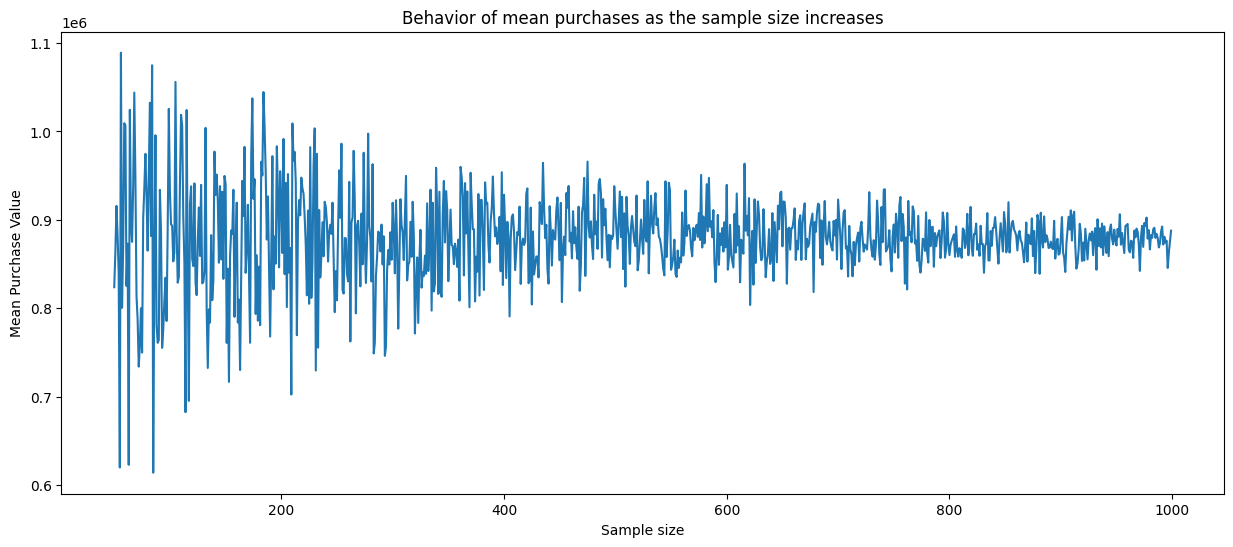

In [115]:
plt.figure(figsize = (15, 6))
plt.title('Behavior of mean purchases as the sample size increases')
plt.plot(np.arange(50, 1000), mean_purchases)
plt.xlabel('Sample size')
plt.ylabel('Mean Purchase Value')
plt.show()

### **Finding the confidence interval of total spending for each individual in the age group 36 - 45 on the Black Friday**

In [116]:
means = []
size = df_age_36_to_45['Total_Purchase'].shape[0]
for bootstrapped_sample in range(10000):
    sample_mean = df_age_36_to_45['Total_Purchase'].sample(size, replace = True).mean()
    means.append(sample_mean)

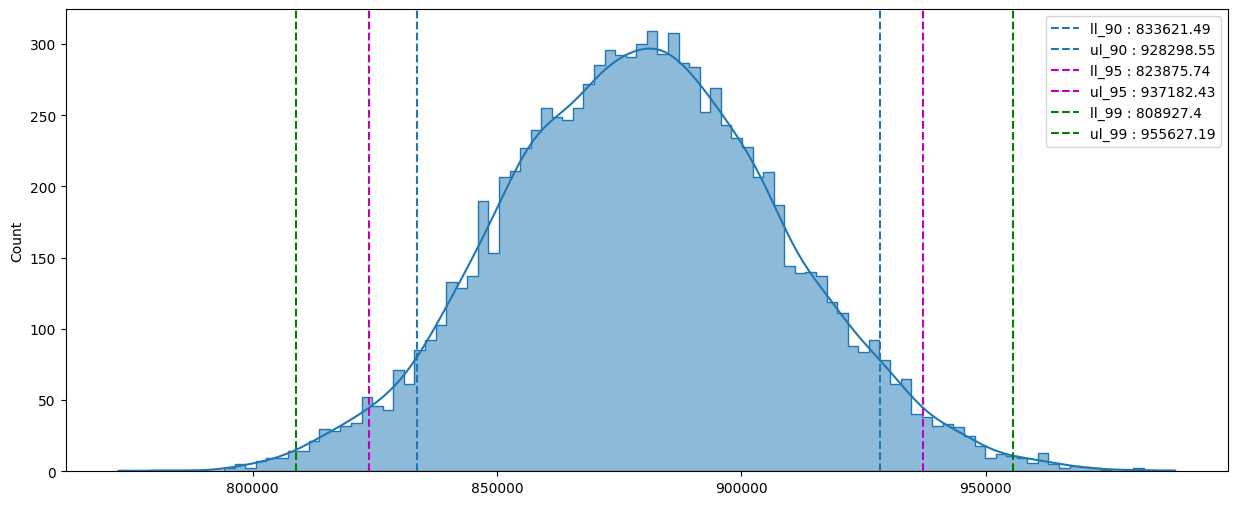

In [117]:
plt.figure(figsize = (15, 6))
sns.histplot(means, kde = True, bins = 100, fill = True, element = 'step')

ll_90 = np.percentile(means, 5)
ul_90 = np.percentile(means, 95)
plt.axvline(ll_90, label = f'll_90 : {round(ll_90, 2)}', linestyle = '--')
plt.axvline(ul_90, label = f'ul_90 : {round(ul_90, 2)}', linestyle = '--')

ll_95 = np.percentile(means, 2.5)
ul_95 = np.percentile(means, 97.5)
plt.axvline(ll_95, label = f'll_95 : {round(ll_95, 2)}', linestyle = '--', color = 'm')
plt.axvline(ul_95, label = f'ul_95 : {round(ul_95, 2)}', linestyle = '--', color = 'm')

ll_99 = np.percentile(means, 0.5)
ul_99 = np.percentile(means, 99.5)
plt.axvline(ll_99, label = f'll_99 : {round(ll_99, 2)}', linestyle = '--', color = 'g')
plt.axvline(ul_99, label = f'ul_99 : {round(ul_99, 2)}', linestyle = '--', color = 'g')

plt.legend()
plt.show()

 - Through the bootstrapping method, we have been able to estimate the confidence interval for the total purchase made by each individual in age group 36 - 45 years on Black Friday at Walmart, despite having data for only 1167 individuals having age group 36 - 45 years. This provides us with a reasonable approximation of the range within which the total purchase of each individuals having age group 36 - 45 years falls, with a certain level of confidence.

In [118]:
print(f"The population mean of total spending of each customer in age group 36 - 45 will be approximately = {np.round(np.mean(means),2)}")

The population mean of total spending of each customer in age group 36 - 45 will be approximately = 879943.3


### **For Age Group 46 - 50 years**

In [119]:
df_age_46_to_50

,User_ID,Total_Purchase
0,1000004,206468
1,1000013,713927
2,1000033,1940418
3,1000035,821303
4,1000044,1180380
...,...,...
526,1006014,528238
527,1006016,3770970
528,1006032,517261
529,1006037,1119538


### **How the deviations vary for different sample sizes ?**

In [120]:
mean_purchases = []
for sample_size in range(50, 500):
    sample_mean = df_age_46_to_50['Total_Purchase'].sample(sample_size).mean()
    mean_purchases.append(sample_mean)

[]

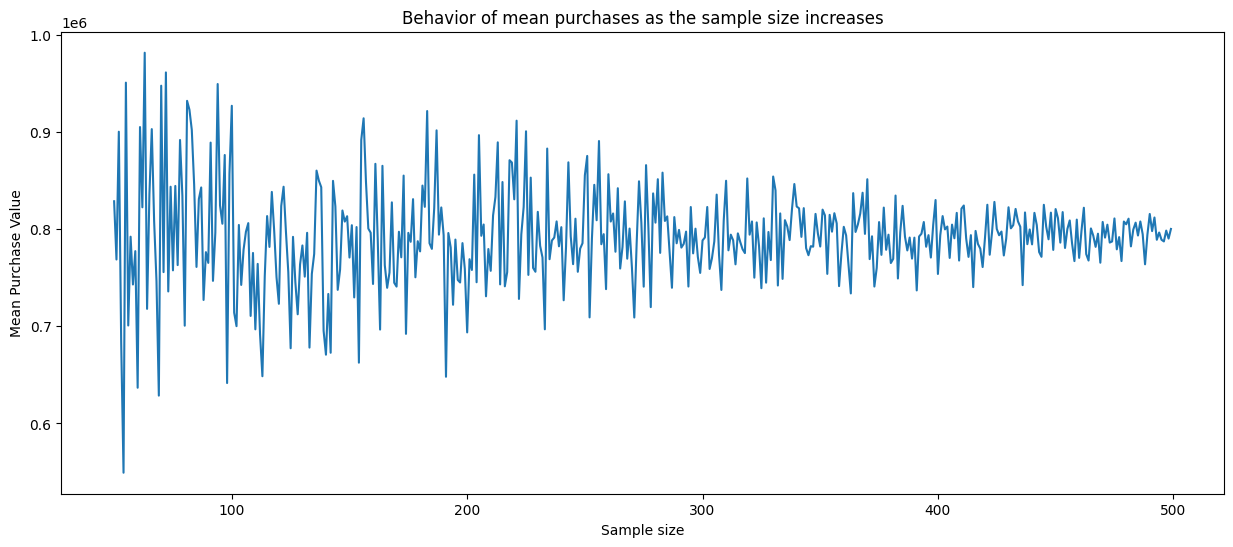

In [121]:
plt.figure(figsize = (15, 6))
plt.title('Behavior of mean purchases as the sample size increases')
plt.plot(np.arange(50, 500), mean_purchases)
plt.xlabel('Sample size')
plt.ylabel('Mean Purchase Value')
plt.plot()

### **Finding the confidence interval of total spending for each individual in the age group 46 - 50 on the Black Friday**

In [122]:
means = []
size = df_age_46_to_50['Total_Purchase'].shape[0]
for bootstrapped_sample in range(10000):
    sample_mean = df_age_46_to_50['Total_Purchase'].sample(size, replace = True).mean()
    means.append(sample_mean)

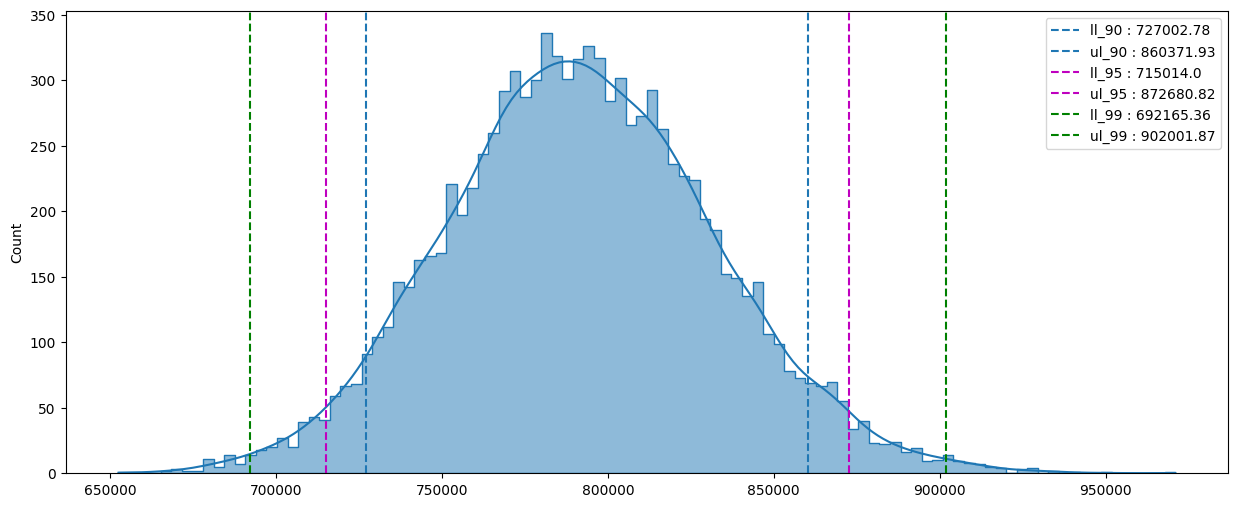

In [123]:
plt.figure(figsize = (15, 6))
sns.histplot(means, kde = True, bins = 100, fill = True, element = 'step')

ll_90 = np.percentile(means, 5)
ul_90 = np.percentile(means, 95)
plt.axvline(ll_90, label = f'll_90 : {round(ll_90, 2)}', linestyle = '--')
plt.axvline(ul_90, label = f'ul_90 : {round(ul_90, 2)}', linestyle = '--')

ll_95 = np.percentile(means, 2.5)
ul_95 = np.percentile(means, 97.5)
plt.axvline(ll_95, label = f'll_95 : {round(ll_95, 2)}', linestyle = '--', color = 'm')
plt.axvline(ul_95, label = f'ul_95 : {round(ul_95, 2)}', linestyle = '--', color = 'm')

ll_99 = np.percentile(means, 0.5)
ul_99 = np.percentile(means, 99.5)
plt.axvline(ll_99, label = f'll_99 : {round(ll_99, 2)}', linestyle = '--', color = 'g')
plt.axvline(ul_99, label = f'ul_99 : {round(ul_99, 2)}', linestyle = '--', color = 'g')

plt.legend()
plt.show()

 - Through the bootstrapping method, we have been able to estimate the confidence interval for the total purchase made by each individual in age group 46 - 50 years on Black Friday at Walmart, despite having data for only 531 individuals having age group 46 - 50 years. This provides us with a reasonable approximation of the range within which the total purchase of each individuals having age group 46 - 50 years falls, with a certain level of confidence.

In [124]:
print(f"The population mean of total spending of each customer in age group 46 - 50 will be approximately = {np.round(np.mean(means),2)}")

The population mean of total spending of each customer in age group 46 - 50 will be approximately = 791913.72


In [125]:
df_age_51_to_55

,User_ID,Total_Purchase
0,1000006,379930
1,1000017,1425995
2,1000054,187451
3,1000059,980118
4,1000060,280029
...,...,...
476,1005967,136189
477,1005993,130022
478,1006002,1843460
479,1006020,374475


In [126]:
mean_purchases = []
for sample_size in range(50, 450):
    sample_mean = df_age_51_to_55['Total_Purchase'].sample(sample_size).mean()
    mean_purchases.append(sample_mean)

[]

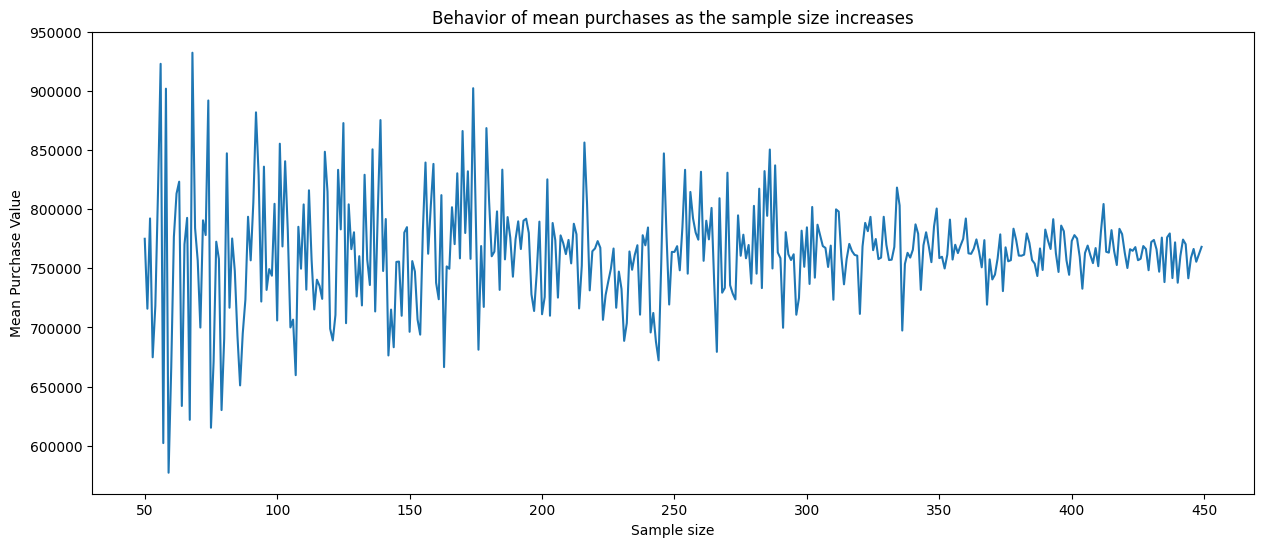

In [127]:
plt.figure(figsize = (15, 6))
plt.title('Behavior of mean purchases as the sample size increases')
plt.plot(np.arange(50, 450), mean_purchases)
plt.xlabel('Sample size')
plt.ylabel('Mean Purchase Value')
plt.plot()

### **Finding the confidence interval of total spending for each individual in the age group 51 - 55 on the Black Friday**

In [128]:
means = []
size = df_age_51_to_55['Total_Purchase'].shape[0]
for bootstrapped_sample in range(10000):
    sample_mean = df_age_51_to_55['Total_Purchase'].sample(size, replace = True).mean()
    means.append(sample_mean)

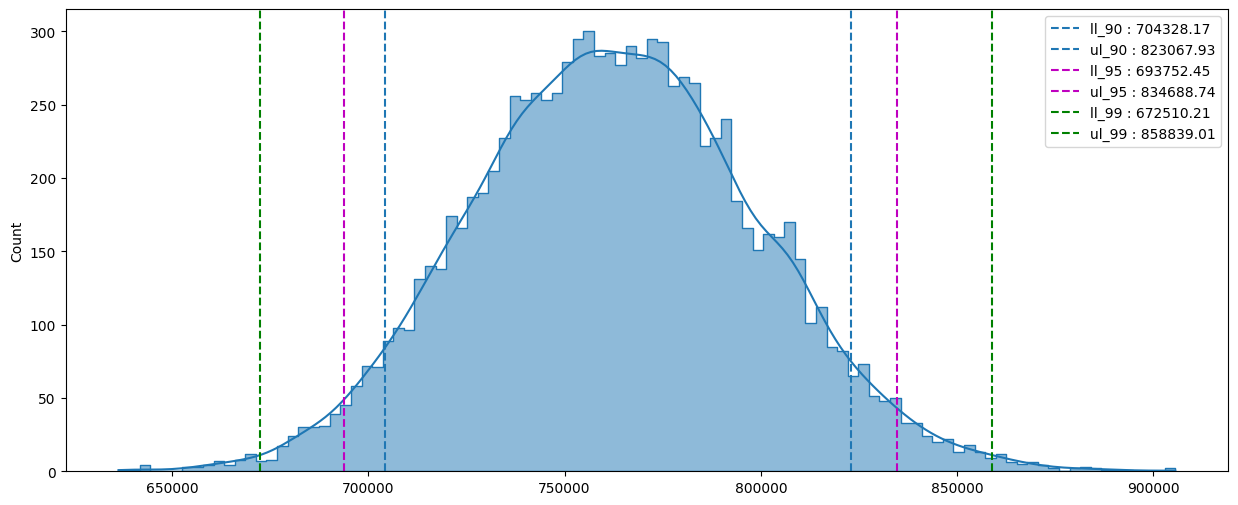

In [129]:
plt.figure(figsize = (15, 6))
sns.histplot(means, kde = True, bins = 100, fill = True, element = 'step')

ll_90 = np.percentile(means, 5)
ul_90 = np.percentile(means, 95)
plt.axvline(ll_90, label = f'll_90 : {round(ll_90, 2)}', linestyle = '--')
plt.axvline(ul_90, label = f'ul_90 : {round(ul_90, 2)}', linestyle = '--')

ll_95 = np.percentile(means, 2.5)
ul_95 = np.percentile(means, 97.5)
plt.axvline(ll_95, label = f'll_95 : {round(ll_95, 2)}', linestyle = '--', color = 'm')
plt.axvline(ul_95, label = f'ul_95 : {round(ul_95, 2)}', linestyle = '--', color = 'm')

ll_99 = np.percentile(means, 0.5)
ul_99 = np.percentile(means, 99.5)
plt.axvline(ll_99, label = f'll_99 : {round(ll_99, 2)}', linestyle = '--', color = 'g')
plt.axvline(ul_99, label = f'ul_99 : {round(ul_99, 2)}', linestyle = '--', color = 'g')

plt.legend()
plt.show()

  - Through the bootstrapping method, we have been able to estimate the confidence interval for the total purchase made by each individual in age group 51 - 55 years on Black Friday at Walmart, despite having data for only 481 individuals having age group 51 - 55 years. This provides us with a reasonable approximation of the range within which the total purchase of each individuals having age group 51 - 55 years falls, with a certain level of confidence.

In [130]:
print(f"The population mean of total spending of each customer in age group 51 - 55 will be approximately = {np.round(np.mean(means),2)}")

The population mean of total spending of each customer in age group 51 - 55 will be approximately = 762883.99


### **For age above 55**

In [131]:
df_age_above_55

,User_ID,Total_Purchase
0,1000002,810472
1,1000031,496154
2,1000080,339364
3,1000089,112276
4,1000090,1310621
...,...,...
367,1005948,2120730
368,1005968,282354
369,1005980,1070641
370,1005986,606283


In [132]:
mean_purchases = []
for sample_size in range(50, 350):
    sample_mean = df_age_above_55['Total_Purchase'].sample(sample_size).mean()
    mean_purchases.append(sample_mean)

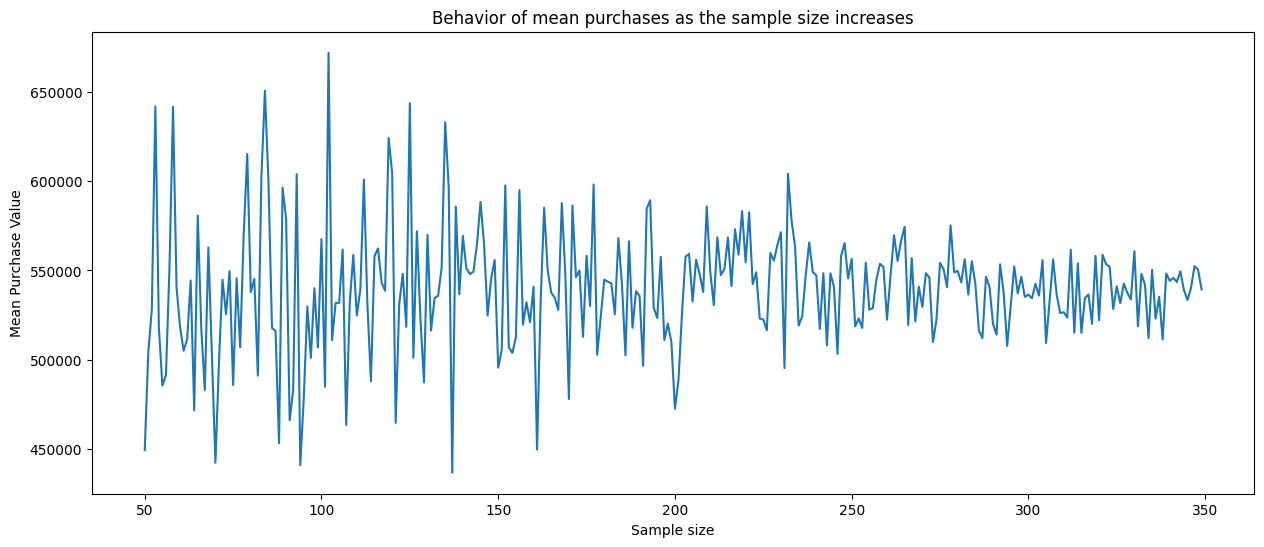

In [133]:
plt.figure(figsize = (15, 6))
plt.title('Behavior of mean purchases as the sample size increases')
plt.plot(np.arange(50, 350), mean_purchases)
plt.xlabel('Sample size')
plt.ylabel('Mean Purchase Value')
plt.show()

### **Finding the confidence interval of total spending for each individual in the age group above 55 on the Black Friday**

In [134]:
means = []
size = df_age_above_55['Total_Purchase'].shape[0]
for bootstrapped_sample in range(10000):
    sample_mean = df_age_above_55['Total_Purchase'].sample(size, replace = True).mean()
    means.append(sample_mean)

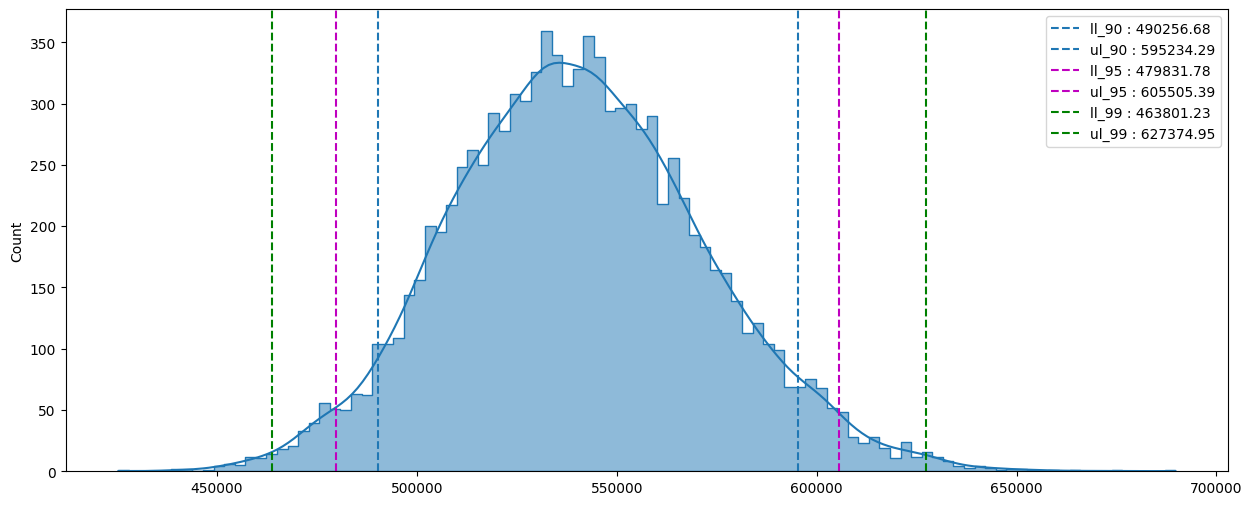

In [135]:
plt.figure(figsize = (15, 6))
sns.histplot(means, kde = True, bins = 100, fill = True, element = 'step')

ll_90 = np.percentile(means, 5)
ul_90 = np.percentile(means, 95)
plt.axvline(ll_90, label = f'll_90 : {round(ll_90, 2)}', linestyle = '--')
plt.axvline(ul_90, label = f'ul_90 : {round(ul_90, 2)}', linestyle = '--')

ll_95 = np.percentile(means, 2.5)
ul_95 = np.percentile(means, 97.5)
plt.axvline(ll_95, label = f'll_95 : {round(ll_95, 2)}', linestyle = '--', color = 'm')
plt.axvline(ul_95, label = f'ul_95 : {round(ul_95, 2)}', linestyle = '--', color = 'm')

ll_99 = np.percentile(means, 0.5)
ul_99 = np.percentile(means, 99.5)
plt.axvline(ll_99, label = f'll_99 : {round(ll_99, 2)}', linestyle = '--', color = 'g')
plt.axvline(ul_99, label = f'ul_99 : {round(ul_99, 2)}', linestyle = '--', color = 'g')

plt.legend()
plt.show()

 - Through the bootstrapping method, we have been able to estimate the confidence interval for the total purchase made by each individual in age group above 55 years on Black Friday at Walmart, despite having data for only 372 individuals having age group above 55 years. This provides us with a reasonable approximation of the range within which the total purchase of each individuals having age group above 55 years falls, with a certain level of confidence.

In [136]:
print(f"The population mean of total spending of each customer in age group above 55 will be approximately = {np.round(np.mean(means),2)}")

The population mean of total spending of each customer in age group above 55 will be approximately = 540357.59


# **Actionable insights**
 - Out of every four transactions made on Black Friday in the Walmart stores, three are made by the males and one is made by the females.
 - 82.33 % of the total transactions are made by the customers belonging to 11 occupations. These are 4, 0, 7, 1, 17, 20, 12, 14, 2, 16, 6 (Ordered in descending order of the total transactions' share.)
 - Majority of the transactions (53.75 % of total transactions) are made by the customers having 1 or 2 years of stay in the current city.
 - 82.43% of the total transactions are made for only 5 Product Categories. These are, 5, 1, 8, 11 and 2.
 - There are 1666 unique female customers and 4225 unique male customers. Average number of transactions made by each Male on Black Friday is 98 while for Female it is 82.
 - On an average each male makes a total purchase of 925344.40 on Black Friday while for each female the figure is 712024.39.
76.72 % of the total revenue is generated from males.
 - Out of 5891 unique customers, 42 % of them are Married and 58 % of them are Single.
 - Average number of transactions made by each user with marital status Married is 91 and for Single it is 95.
 - On an average each Married customer makes a total purchase of 354249.75 on Black Friday while for each Single customer the figure is 510766.83.
 - 59.05 % of the total revenue is generated from the customers who are Single.
 - Majority of the transactions are made by the customers whose age is between 26 and 45 years.
 - About 81.82% of the total transactions are made by customers of age between 18 and 50 years.
 - 81.82 % of total unique customers have age between 18 and 50 years.
 - Out of all unique customers, 34.85 % belong to the age group of 26 - 35 years, 19.81 % belong to the age group of 36 - 45 years, 18.15 % belong to the age group of 18 - 25 years, 9.01 % belong to the age group of 46 - 50 years.
 - Walmart generated 86.21 % of total revenue from customers in range 18 to 50 years on Black Friday.
 - 39.87 % of the total revenue is generated from the customers having age group of 26 - 35 years, 20.15 % is generated from 36 - 45 years, 17.93 % from 18 - 25 years, 8.26 % from 46 - 50 years.
 - Majority of the total unique customers belong to the city C. 82.26 % of the total unique customers belong to city C and B.
 - Walmart generated 41.52 % of the total revenue from the customers belonging to the city B, 32.65 % from city C and 25.83 % from city A on Black Friday.
 - Top 5 product categories from which Walmart made 84.36 % of total revenue on Black Friday are 1, 5, 8, 6 and 2.
 - We find on analysing bivaritely that most people having a age bracket of 26-35 years belongs to B city category with 1 year of stay in the current city.   
 - The population mean of total spending of each male will be approximately = 925238.95.
 - The population mean of total spending of each female will be approximately = 712405.63
 - The population mean of total spending of each single will be approximately = 880833.45
 - The population mean of total spending of each married will be approximately = 843499.34
 - The population mean of total spending of each customer in age group 0 -17 will be approximately = 618195.42
 - The population mean of total spending of each customer in age group 18 - 25 will be approximately = 855010.09
 - The population mean of total spending of each customer in age group 26 - 35 will be approximately = 989411.24
 - The population mean of total spending of each customer in age group 36 - 45 will be approximately = 879943.3
 - The population mean of total spending of each customer in age group 46 - 50 will be approximately = 791913.72
 - The population mean of total spending of each customer in age group 51 - 55 will be approximately = 762883.99
 - The population mean of total spending of each customer in age group above 55 will be approximately = 540357.59

# **Recommendations**
 - As majority of transactions are made by males, it would be beneficial to tailor marketing strategies to cater to their preferences, needs and taste. This include methods like promotions, product offerings or advertising campaigns to attract male customers.

 - Since 82.33% of transactions are bagged by 11 specific occupations, it would be helpful to focus on these group to organize marketing campaigns and customized offers.

 - 53.75% come from customers who have recently moved to the current city. These groups can be targeted bu building opputunities like welcoming offers, incentives fro newcomers which can help in further bosst in sales.

 - 82.43% of transactions are concentrated in just five product categories, improvising some offers within these product categories can maximise the potential sales.Analyze the popular product categories and identify opportunities to expand the product range within those categories. This can attract more customers and increase sales. Additionally, identify complementary products or cross-selling opportunities to encourage customers to make additional purchases.

 - Given that 59.05 % of total revenue is generated by single customers, understanding their motivations and targeting them with personalised offers can enhance their shopping experiences and loyalty.

 - As it's evident that maximum transactions occurred in the age bracket of 26-35, offers can be aligned with their interest and values to maximize revenue generations.

 - With a significant number of customers belonging to specific cities, tailoring marketing strategies to target these locations can lead to better results. Allocating resources, promotions, and events based on the customer concentration in each city can help drive sales.

 -  Leverage seasonal events, holidays, and special occasions to offer targeted promotions and discounts. Aligning marketing campaigns and product offerings with these events can create a sense of urgency and drive sales.

 - As female transactions are low as compared to the male transactions, a sample study regarding their preferences in different product categories can be conducted to tailor offers, marketing campaign, complementary product packages in order to boost sales among them.

 - Implement targeted marketing campaigns and communication strategies to engage customers regularly. This can include personalized email campaigns, social media engagement, and special promotions tailored to different customer segments. Keeping customers informed about new products, offers, and events can increase their engagement and encourage them to make more purchases.          